<a href="https://colab.research.google.com/github/prem277/Binary-Classification-for-Credit-Risk-Prediction/blob/main/Binary-Classification-for-Credit-Risk-Prediction-in-Peer-To-Peer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

df=pd.read_csv('/content/drive/MyDrive/LoanData.csv')
df.head()

<ipython-input-1-27c1c547f99a>:7: DtypeWarning: Columns (12,34,38,67,80,82,83,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/LoanData.csv')


ReportAsOfEOD                                LoanId  LoanNumber  \
0    2024-06-19  D8EBF360-104C-420F-BEC9-000924E6EFC7     3015853   
1    2024-06-19  C1A98DDA-5E20-429C-BBFF-0009A05354E0     3743447   
2    2024-06-19  9B0B252E-45B9-4172-8E2D-0014A8F18117     4335414   
3    2024-06-19  66AE108B-532B-4BB3-BAB7-0019A46412C1      483449   
4    2024-06-19  C7EA512A-465D-4043-A9F2-001B14C3C14E     4043783   

           ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  BidsApi  \
0  2022-09-09 12:27:01  2022-09-09 15:27:01                    11      0.0   
1  2023-05-19 11:04:33  2023-05-19 14:04:33                     0      0.0   
2  2024-02-03 14:43:32  2024-02-03 16:43:32                     0      0.0   
3  2016-03-23 16:07:19  2016-03-23 16:07:19                   970   1150.0   
4  2023-09-26 12:14:12  2023-09-26 15:14:12                     0      0.0   

   BidsManual                                 PartyId  NewCreditCustomer  ...  \
0        88.0  {1AD71AF0-8240-4700-B602-ADA90177DD8C}              False  ...   
1         0.0  {3A9CF70B-0BD2-4ECE-8997-AF7F00D0EC5A}              False  ...   
2         0.0  {FBC12A4E-7A50-4906-8C57-AFA2010015C5}              False  ...   
3         5.0  {EBF05573-554D-4A3B-BC77-A2CF00B7D110}              False  ...   
4         0.0  {7ACD344F-2823-47D4-ACAB-ADF900FB7F7B}              False  ...   

  PreviousEarlyRepaymentsCountBeforeLoan GracePeriodStart GracePeriodEnd  \
0                                    0.0              NaN            NaN   
1                                    0.0              NaN            NaN   
2                                    0.0              NaN            NaN   
3                                    0.0       2019-10-28     2020-01-27   
4                                    0.0              NaN            NaN   

  NextPaymentDate NextPaymentNr NrOfScheduledPayments  ReScheduledOn  \
0      2024-06-26           7.0                  23.0     2023-11-30   
1             NaN           0.0                 120.0     2023-07-20   
2      2024-07-08           1.0                 120.0     2024-06-08   
3             NaN           NaN                   NaN            NaN   
4      2024-07-04          10.0                 108.0            NaN   

   PrincipalDebtServicingCost  InterestAndPenaltyDebtServicingCost  \
0                         NaN                                  NaN   
1                         NaN                                  NaN   
2                         NaN                                  NaN   
3                         0.0                                82.76   
4                         NaN                                  NaN   

   ActiveLateLastPaymentCategory  
0                            NaN  
1                        121-150  
2                            NaN  
3                           180+  
4                            NaN  

[5 rows x 112 columns]

In [ ]:
import numpy as np

# Convert 'DefaultDate' to binary indicator
df['DefaultDate'] = np.where(df['DefaultDate'].apply(lambda x: isinstance(x, str)), 1, 0)
df['DefaultDate'].head()


0    0
1    1
2    0
3    1
4    0
Name: DefaultDate, dtype: int64

In [ ]:
len(df)

401706

In [ ]:
'''#undo
#remove columns having 40% or more NaN values
df.dropna(thresh=len(df)*0.6,axis=1,inplace=True)
df.shape'''

'#undo\n#remove columns having 40% or more NaN values\ndf.dropna(thresh=len(df)*0.6,axis=1,inplace=True)\ndf.shape'

In [ ]:
df.columns

Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'PartyId', 'NewCreditCustomer',
       ...
       'PreviousEarlyRepaymentsCountBeforeLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'NextPaymentNr',
       'NrOfScheduledPayments', 'ReScheduledOn', 'PrincipalDebtServicingCost',
       'InterestAndPenaltyDebtServicingCost', 'ActiveLateLastPaymentCategory'],
      dtype='object', length=112)

In [ ]:
useless_f=['LanguageCode', 'NewCreditCustomer', 'VerificationType',
 'Age',  'Gender',
 'Amount',
 'Interest',
 'LoanDuration',
 'MonthlyPayment',
'UseOfLoan',
 'Education',
 'MaritalStatus',
 'NrOfDependants',
 'EmploymentStatus',
 'PreviousEarlyRepaymentsBefoleLoan',
 'EmploymentDurationCurrentEmployer',
'WorkExperience',
 'OccupationArea',
 'HomeOwnershipType',
'ExistingLiabilities',
 'LiabilitiesTotal',
 'RefinanceLiabilities',
 'DebtToIncome',
 'FreeCash',
 'Rating',
 'NoOfPreviousLoansBeforeLoan',
 'AmountOfPreviousLoansBeforeLoan','DefaultDate',
 'PreviousRepaymentsBeforeLoan']
print(len(useless_f))

29


In [ ]:
'''useless_f=['Age','Interest','MonthlyPayment','VerificationType', 'LanguageCode','UseOfLoan', 'Education','EmploymentStatus','EmploymentDurationCurrentEmployer','OccupationArea',
       'MaritalStatus', 'Gender','Rating','LoanDuration','HomeOwnershipType', 'NoOfPreviousLoansBeforeLoan', 'NrOfDependants','WorkExperience',
       'DefaultDate','Amount' ]'''
for i  in df.columns:
  if i not in useless_f:
      df.drop(i,axis=1,inplace=True)
print(df.shape)
df.head()

(401706, 29)


NewCreditCustomer  VerificationType  LanguageCode  Age  Gender  Amount  \
0              False               4.0             1   27     1.0  3189.0   
1              False               4.0             4   35     1.0  4146.0   
2              False               4.0             1   23     0.0   531.0   
3              False               4.0             1   53     1.0  2125.0   
4              False               4.0             4   43     0.0   414.0   

   Interest  LoanDuration  MonthlyPayment  UseOfLoan  ...  LiabilitiesTotal  \
0     35.48            60          115.34         -1  ...              0.00   
1     19.86            60          108.17         -1  ...              0.00   
2     19.52            60           15.25         -1  ...              0.00   
3     20.97            60           62.05          2  ...            485.09   
4     19.89           108            6.65         -1  ...              0.00   

   RefinanceLiabilities DebtToIncome  FreeCash DefaultDate Rating  \
0                     0         0.00      0.00           0      D   
1                     0         0.00      0.00           1      B   
2                     0         0.00      0.00           0      B   
3                     6        26.29     10.92           1      C   
4                     0         0.00      0.00           0      D   

   NoOfPreviousLoansBeforeLoan  AmountOfPreviousLoansBeforeLoan  \
0                          1.0                           3402.0   
1                          1.0                            518.0   
2                          3.0                           1593.0   
3                          1.0                            500.0   
4                          5.0                          11198.0   

   PreviousRepaymentsBeforeLoan  PreviousEarlyRepaymentsBefoleLoan  
0                       1161.57                                NaN  
1                        525.21                                NaN  
2                        631.35                                NaN  
3                        590.95                                0.0  
4                       1176.22                                NaN  

[5 rows x 29 columns]

In [ ]:
'''#undo
useless_f=['ReportAsOfEOD','LoanId','LoanNumber','ListedOnUTC','BiddingStartedOn','BidsApi', 'BidsManual','PartyId','OccupationArea','Country','EmploymentDurationCurrentEmployer','IncomeOther','IncomeFromLeavePay','IncomeFromChildSupport', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'LoanApplicationStartedDate','LoanDate','FirstPaymentDate','PrincipalOverdueBySchedule','ModelVersion', 'PrincipalBalance', 'PlannedInterestTillDate','MaturityDate_Original','MaturityDate_Last','BidsPortfolioManager','UseOfLoan', 'AppliedAmount','IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare','ExpectedLoss','LossGivenDefault','ExpectedReturn']
for i in useless_f:
  df.drop(i,axis=1,inplace=True)
df.shape'''

"#undo\nuseless_f=['ReportAsOfEOD','LoanId','LoanNumber','ListedOnUTC','BiddingStartedOn','BidsApi', 'BidsManual','PartyId','OccupationArea','Country','EmploymentDurationCurrentEmployer','IncomeOther','IncomeFromLeavePay','IncomeFromChildSupport', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',\n       'LoanApplicationStartedDate','LoanDate','FirstPaymentDate','PrincipalOverdueBySchedule','ModelVersion', 'PrincipalBalance', 'PlannedInterestTillDate','MaturityDate_Original','MaturityDate_Last','BidsPortfolioManager','UseOfLoan', 'AppliedAmount','IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare','ExpectedLoss','LossGivenDefault','ExpectedReturn']\nfor i in useless_f:\n  df.drop(i,axis=1,inplace=True)\ndf.shape"

In [ ]:
'''from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['County'] = label_encoder.fit_transform(df['County'])
df.head()'''

"from sklearn.preprocessing import LabelEncoder\nlabel_encoder = LabelEncoder()\ndf['County'] = label_encoder.fit_transform(df['County'])\ndf.head()"

In [ ]:
df.dropna(inplace=True)
df.shape

(28815, 29)

In [ ]:
boo_cols=['NewCreditCustomer','Restructured','ActiveScheduleFirstPaymentReached']
for c in boo_cols:
  if c in df.columns:
    df[c]=df[c].astype(int)
df.head()

NewCreditCustomer  VerificationType  LanguageCode  Age  Gender  Amount  \
3                   0               4.0             1   53     1.0  2125.0   
8                   0               1.0             1   50     1.0  3000.0   
12                  1               4.0             1   44     0.0  9100.0   
15                  1               3.0             6   42     0.0  1500.0   
18                  1               4.0             6   34     1.0  1090.0   

    Interest  LoanDuration  MonthlyPayment  UseOfLoan  ...  LiabilitiesTotal  \
3      20.97            60           62.05          2  ...            485.09   
8      17.12            60           84.75          3  ...            736.45   
12     13.67            60          268.57          3  ...            905.00   
15     40.40            60           63.53          2  ...            350.00   
18     68.39            48          101.19          7  ...            940.00   

    RefinanceLiabilities DebtToIncome  FreeCash DefaultDate Rating  \
3                      6        26.29     10.92           1      C   
8                      0        30.58     78.80           1      B   
12                     3        26.71    349.43           1      A   
15                     0         7.36    449.47           1      F   
18                     2        36.04     95.81           1     HR   

    NoOfPreviousLoansBeforeLoan  AmountOfPreviousLoansBeforeLoan  \
3                           1.0                            500.0   
8                           1.0                           1800.0   
12                          0.0                              0.0   
15                          0.0                              0.0   
18                          0.0                              0.0   

    PreviousRepaymentsBeforeLoan  PreviousEarlyRepaymentsBefoleLoan  
3                         590.95                                0.0  
8                         445.26                             3000.0  
12                          0.00                                0.0  
15                          0.00                             1500.0  
18                          0.00                                0.0  

[5 rows x 29 columns]

In [ ]:
label_En={}
categorical_cols=df.select_dtypes(include=['object']).columns
for i in categorical_cols:
  if df[i].dtype=='object':
    le=LabelEncoder()
    df[i] = df[i].astype(str)
    df[i]=le.fit_transform(df[i])
    label_En[i]=le
df.head()

NewCreditCustomer  VerificationType  LanguageCode  Age  Gender  Amount  \
3                   0               4.0             1   53     1.0  2125.0   
8                   0               1.0             1   50     1.0  3000.0   
12                  1               4.0             1   44     0.0  9100.0   
15                  1               3.0             6   42     0.0  1500.0   
18                  1               4.0             6   34     1.0  1090.0   

    Interest  LoanDuration  MonthlyPayment  UseOfLoan  ...  LiabilitiesTotal  \
3      20.97            60           62.05          2  ...            485.09   
8      17.12            60           84.75          3  ...            736.45   
12     13.67            60          268.57          3  ...            905.00   
15     40.40            60           63.53          2  ...            350.00   
18     68.39            48          101.19          7  ...            940.00   

    RefinanceLiabilities  DebtToIncome  FreeCash  DefaultDate  Rating  \
3                      6         26.29     10.92            1       3   
8                      0         30.58     78.80            1       2   
12                     3         26.71    349.43            1       0   
15                     0          7.36    449.47            1       6   
18                     2         36.04     95.81            1       7   

    NoOfPreviousLoansBeforeLoan  AmountOfPreviousLoansBeforeLoan  \
3                           1.0                            500.0   
8                           1.0                           1800.0   
12                          0.0                              0.0   
15                          0.0                              0.0   
18                          0.0                              0.0   

    PreviousRepaymentsBeforeLoan  PreviousEarlyRepaymentsBefoleLoan  
3                         590.95                                0.0  
8                         445.26                             3000.0  
12                          0.00                                0.0  
15                          0.00                             1500.0  
18                          0.00                                0.0  

[5 rows x 29 columns]

In [ ]:
cor_mx=df.corr()
cor_mx.head()

NewCreditCustomer  VerificationType  LanguageCode  \
NewCreditCustomer           1.000000          0.058218      0.245027   
VerificationType            0.058218          1.000000     -0.040836   
LanguageCode                0.245027         -0.040836      1.000000   
Age                        -0.039254         -0.065781      0.094983   
Gender                      0.075974         -0.022237      0.173318   

                        Age    Gender    Amount  Interest  LoanDuration  \
NewCreditCustomer -0.039254  0.075974  0.054122  0.206278     -0.047077   
VerificationType  -0.065781 -0.022237  0.181803 -0.179738      0.098813   
LanguageCode       0.094983  0.173318 -0.092185  0.479085     -0.031761   
Age                1.000000  0.049090  0.069557 -0.091194      0.067015   
Gender             0.049090  1.000000 -0.063044  0.341341     -0.024842   

                   MonthlyPayment  UseOfLoan  ...  LiabilitiesTotal  \
NewCreditCustomer        0.082363  -0.047604  ...         -0.049254   
VerificationType        -0.123476  -0.077254  ...          0.059768   
LanguageCode             0.196294   0.105587  ...          0.145827   
Age                      0.009891  -0.065277  ...          0.113761   
Gender                   0.104940   0.050956  ...         -0.001929   

                   RefinanceLiabilities  DebtToIncome  FreeCash  DefaultDate  \
NewCreditCustomer              0.054795     -0.170937  0.028898     0.144973   
VerificationType               0.270742      0.223029 -0.066637    -0.030018   
LanguageCode                  -0.037580     -0.011231  0.052806     0.279585   
Age                            0.000352     -0.012542  0.024509    -0.003453   
Gender                         0.066474      0.164707 -0.047337     0.058429   

                     Rating  NoOfPreviousLoansBeforeLoan  \
NewCreditCustomer  0.314216                    -0.691346   
VerificationType  -0.136142                    -0.032674   
LanguageCode       0.608987                    -0.241744   
Age               -0.181961                     0.031087   
Gender             0.143691                    -0.060495   

                   AmountOfPreviousLoansBeforeLoan  \
NewCreditCustomer                        -0.662657   
VerificationType                         -0.037919   
LanguageCode                             -0.226809   
Age                                       0.052290   
Gender                                   -0.074181   

                   PreviousRepaymentsBeforeLoan  \
NewCreditCustomer                     -0.511370   
VerificationType                      -0.008431   
LanguageCode                          -0.190474   
Age                                    0.035481   
Gender                                -0.064024   

                   PreviousEarlyRepaymentsBefoleLoan  
NewCreditCustomer                          -0.135676  
VerificationType                           -0.005683  
LanguageCode                               -0.043206  
Age                                         0.008763  
Gender                                     -0.042716  

[5 rows x 29 columns]

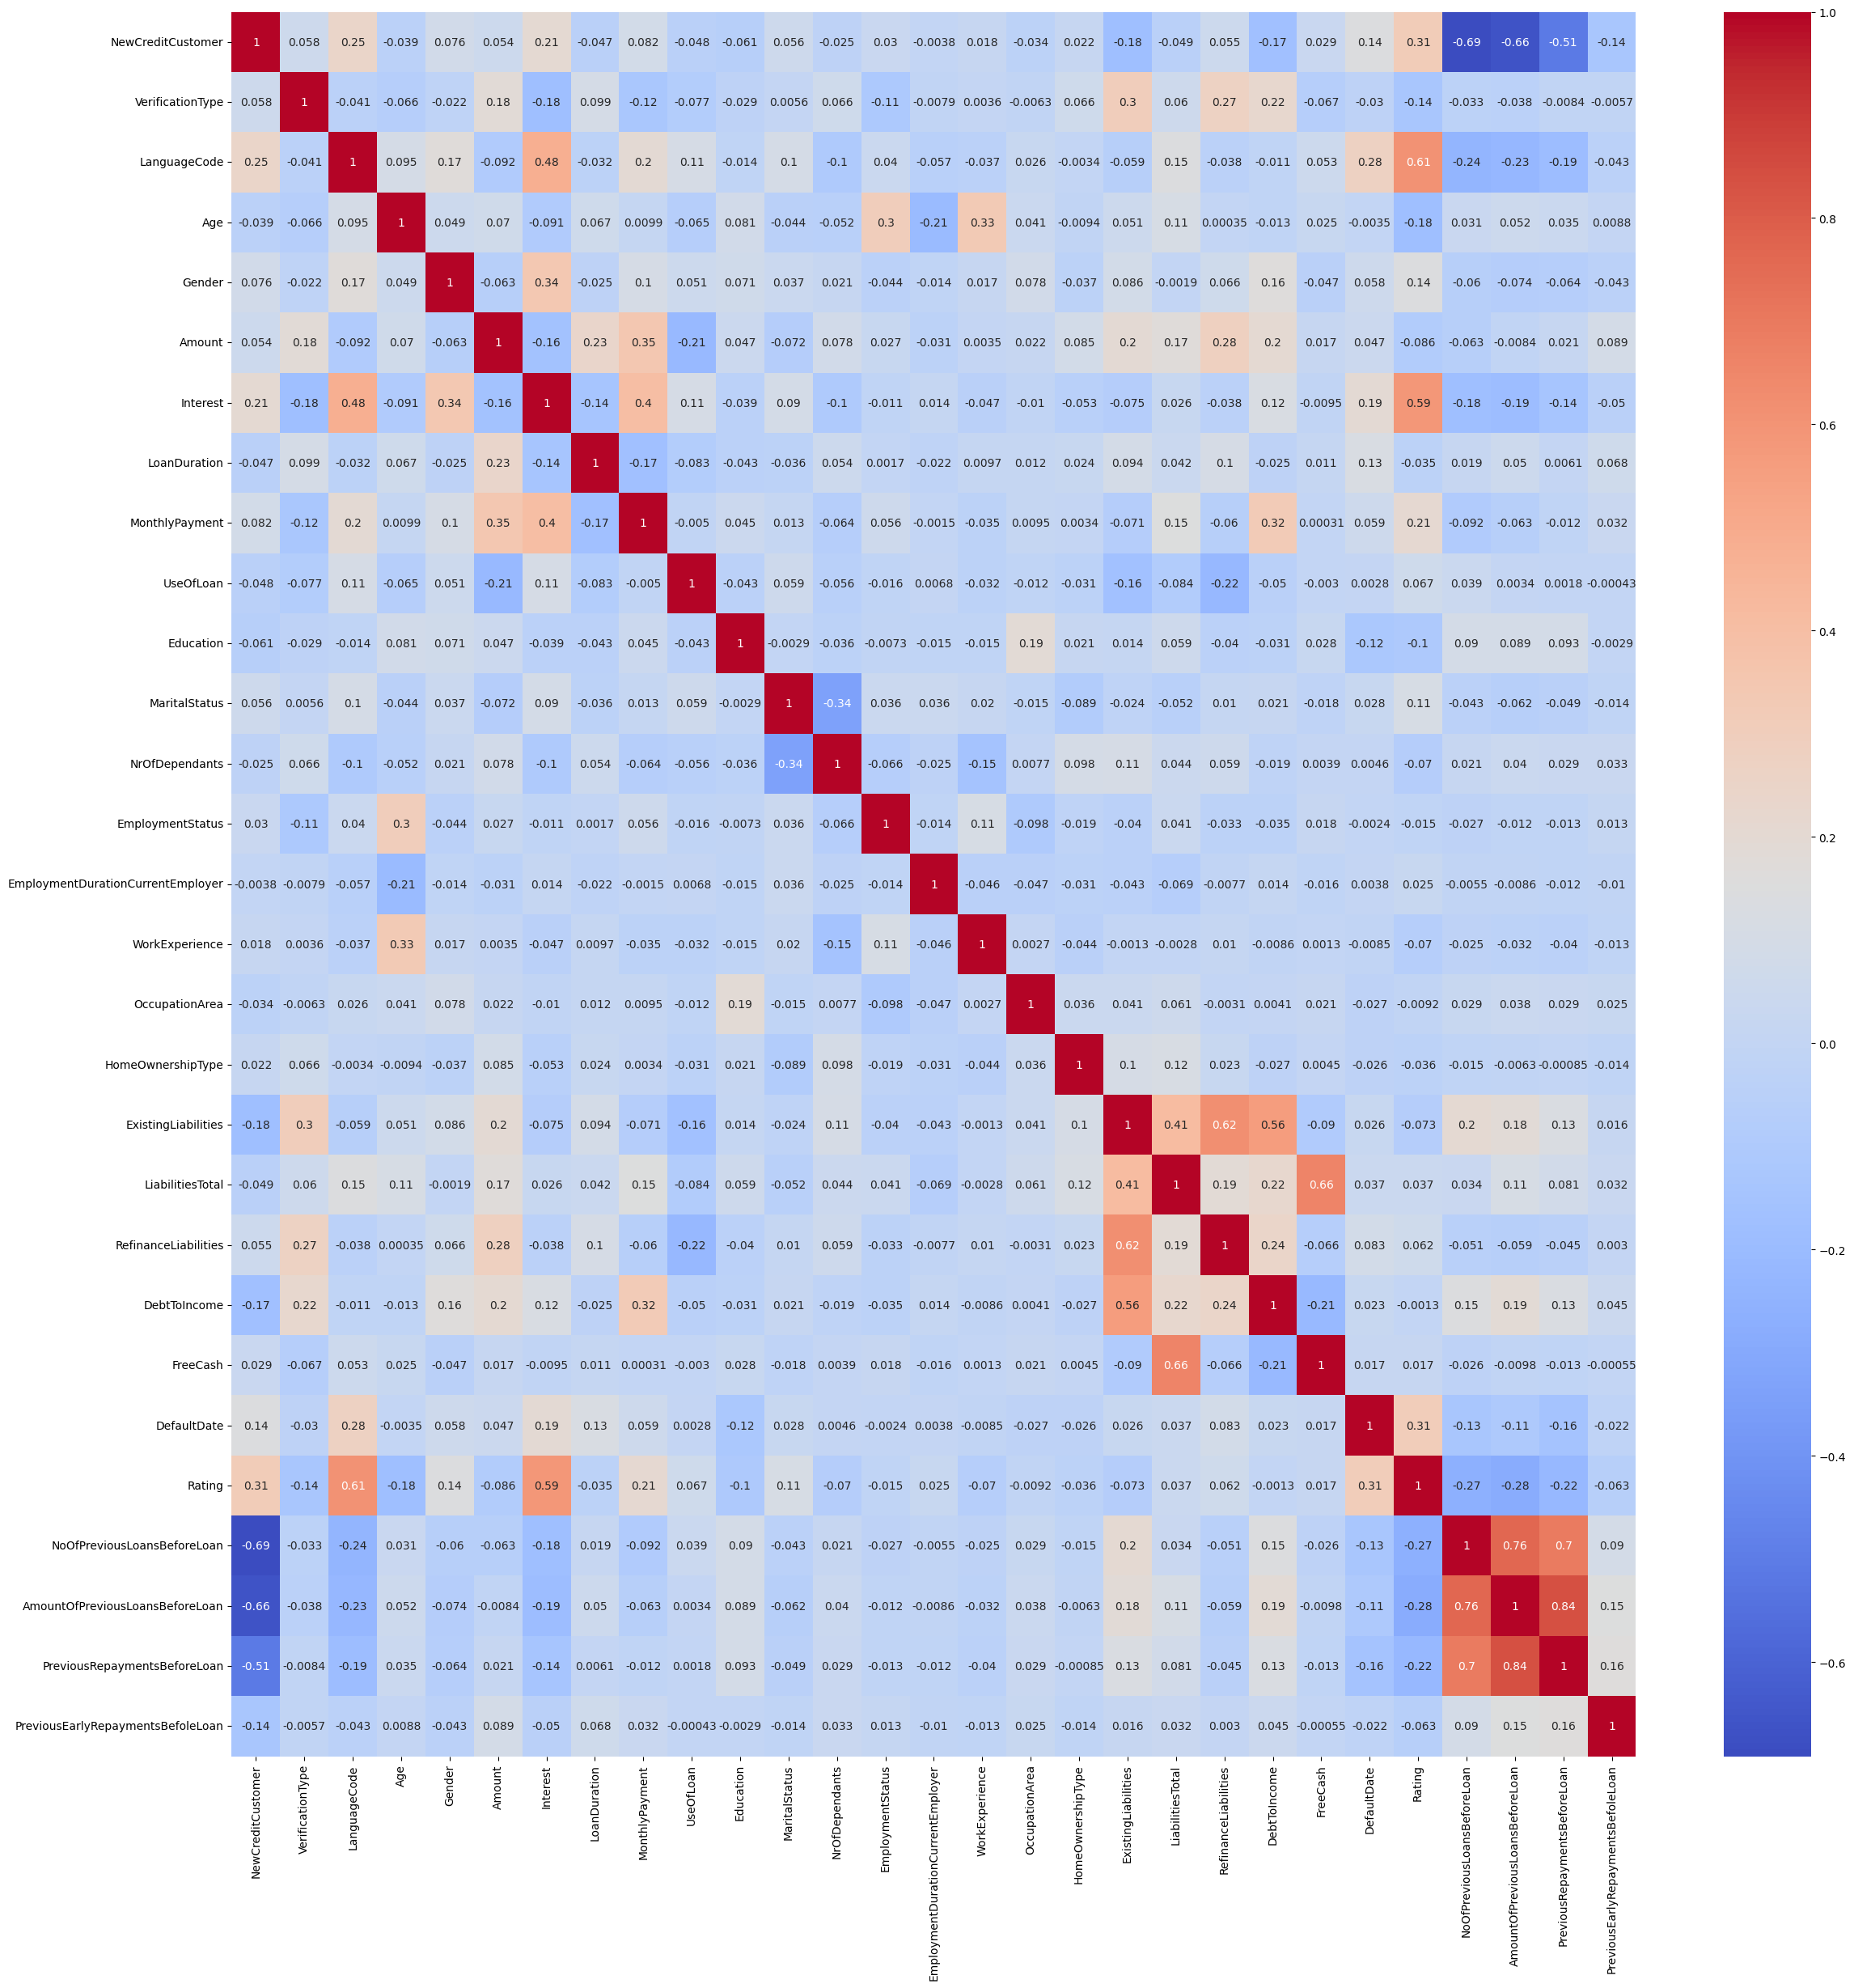

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(28,28))
sns.heatmap(cor_mx,annot=True,cmap='coolwarm',cbar=True)
plt.show()

In [ ]:
upper=cor_mx.where(np.triu(np.ones(cor_mx.shape),k=1).astype(bool))
dp=[c for c in upper.columns if any(upper[c]>0.9)]
print(dp)
df.drop(dp,axis=1,inplace=True)
df.shape

[]


(28815, 29)

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)  # Format numbers to 2 decimal places
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Increase display width
df.describe()

NewCreditCustomer  VerificationType  LanguageCode      Age   Gender   Amount  Interest  LoanDuration  MonthlyPayment  UseOfLoan  Education  MaritalStatus  NrOfDependants  EmploymentStatus  EmploymentDurationCurrentEmployer  WorkExperience  OccupationArea  HomeOwnershipType  ExistingLiabilities  LiabilitiesTotal  RefinanceLiabilities  DebtToIncome  FreeCash  DefaultDate   Rating  NoOfPreviousLoansBeforeLoan  AmountOfPreviousLoansBeforeLoan  PreviousRepaymentsBeforeLoan  PreviousEarlyRepaymentsBefoleLoan
count           28815.00          28815.00      28815.00 28815.00 28815.00 28815.00  28815.00      28815.00        28815.00   28815.00   28815.00       28815.00        28815.00          28815.00                           28815.00        28815.00        28815.00           28815.00             28815.00          28815.00              28815.00      28815.00  28815.00     28815.00 28815.00                     28815.00                         28815.00                      28815.00                           28815.00
mean                0.65              2.69          3.01    38.44     0.54  2699.48     35.59         45.44          134.03       3.86       3.75           2.29            1.99              3.27                               2.13            2.25            7.80               3.23                 4.50            861.76                  0.62         31.05    480.14         0.62     4.52                         0.66                          1374.75                        709.10                             345.47
std                 0.48              1.28          2.12    11.35     0.61  2151.61     26.77         17.09          149.86       2.73       1.02           1.04            2.72              0.83                               2.04            1.75            5.60               2.41                 3.39            865.65                  1.56         19.01   1415.37         0.49     1.95                         1.24                          2669.63                       1827.16                            1572.39
min                 0.00              1.00          1.00    19.00     0.00   115.00      7.62          3.00            0.00       0.00       1.00           1.00            0.00              0.00                               0.00            0.00           -1.00               0.00                 0.00              0.00                  0.00          0.00    -76.93         0.00     0.00                         0.00                             0.00                          0.00                               0.00
25%                 0.00              1.00          1.00    29.00     0.00  1060.00     22.00         36.00           39.63       2.00       3.00           1.00            0.00              3.00                               0.00            1.00            3.00               1.00                 2.00            436.00                  0.00         15.34    121.28         0.00     3.00                         0.00                             0.00                          0.00                               0.00
50%                 1.00              3.00          3.00    37.00     0.00  2125.00     30.00         48.00           94.11       3.00       4.00           2.00            1.00              3.00                               2.00            2.00            7.00               2.00                 4.00            675.27                  0.00         28.38    357.17         1.00     4.00                         0.00                             0.00                          0.00                               0.00
75%                 1.00              4.00          4.00    46.00     1.00  3400.00     37.00         60.00          177.80       7.00       5.00           3.00            2.00              3.00                               4.00            3.00           11.00               4.00                 6.00           1075.00                  0.00         45.22    664.43         1.00     6.00               

In [ ]:
from sklearn.model_selection import train_test_split

x=df.drop('DefaultDate',axis=1)
y=df['DefaultDate']

In [ ]:
'''#undo
#feature selection by using Random forest
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x,y)

importance_features=rf.feature_importances_
print(importance_features)'''

'#undo\n#feature selection by using Random forest\nfrom sklearn.ensemble import RandomForestClassifier\n\nrf=RandomForestClassifier(n_estimators=100,random_state=42)\nrf.fit(x,y)\n\nimportance_features=rf.feature_importances_\nprint(importance_features)'

In [ ]:
'''#undo
importance_features_df=pd.DataFrame({'Feature': x.columns,'Importance':importance_features})
importance_features_df=importance_features_df.sort_values(by='Importance',ascending=False)

selected_features=importance_features_df.head(25)['Feature'].tolist()
print(selected_features)
x=x[selected_features]
print(x.shape)'''

"#undo\nimportance_features_df=pd.DataFrame({'Feature': x.columns,'Importance':importance_features})\nimportance_features_df=importance_features_df.sort_values(by='Importance',ascending=False)\n\nselected_features=importance_features_df.head(25)['Feature'].tolist()\nprint(selected_features)\nx=x[selected_features]\nprint(x.shape)"

In [ ]:
y.value_counts()

DefaultDate
1    17826
0    10989
Name: count, dtype: int64

In [ ]:
#tomek link
from imblearn.under_sampling import TomekLinks

tl=TomekLinks()
x,y=tl.fit_resample(x,y)
print(x.shape)


(25655, 28)


In [ ]:
y.value_counts()

DefaultDate
1    14666
0    10989
Name: count, dtype: int64

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version=1)
x,y  = nm.fit_resample(x, y)
print(x.shape)

(21978, 28)


In [ ]:
y.value_counts()

DefaultDate
0    10989
1    10989
Name: count, dtype: int64

In [ ]:
#spliting dataset
X_train,X_test,Y_train,Y_test=train_test_split(x,y, test_size=0.2 ,random_state=42)

In [ ]:
#train the models

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_pred=log_reg.predict(X_test)
a_lr=accuracy_score(Y_test,Y_pred)
p_lr=precision_score(Y_test,Y_pred)
r_lr=recall_score(Y_test,Y_pred)
f1_lr=f1_score(Y_test,Y_pred)
print("Logistic regression:")
print("accuracy:",a_lr)
print('precision',p_lr)
print('recall',r_lr)
print('f1',f1_lr)



Logistic regression:
accuracy: 0.6954049135577798
precision 0.6496172581767571
recall 0.8490222828558436
f1 0.73605361718904


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

# Instead of passing the model directly, pass the prediction function:
explainer = shap.Explainer(log_reg.predict, X_test)
shap_values = explainer(X_test)

PermutationExplainer explainer: 4397it [04:07, 17.74it/s]                          


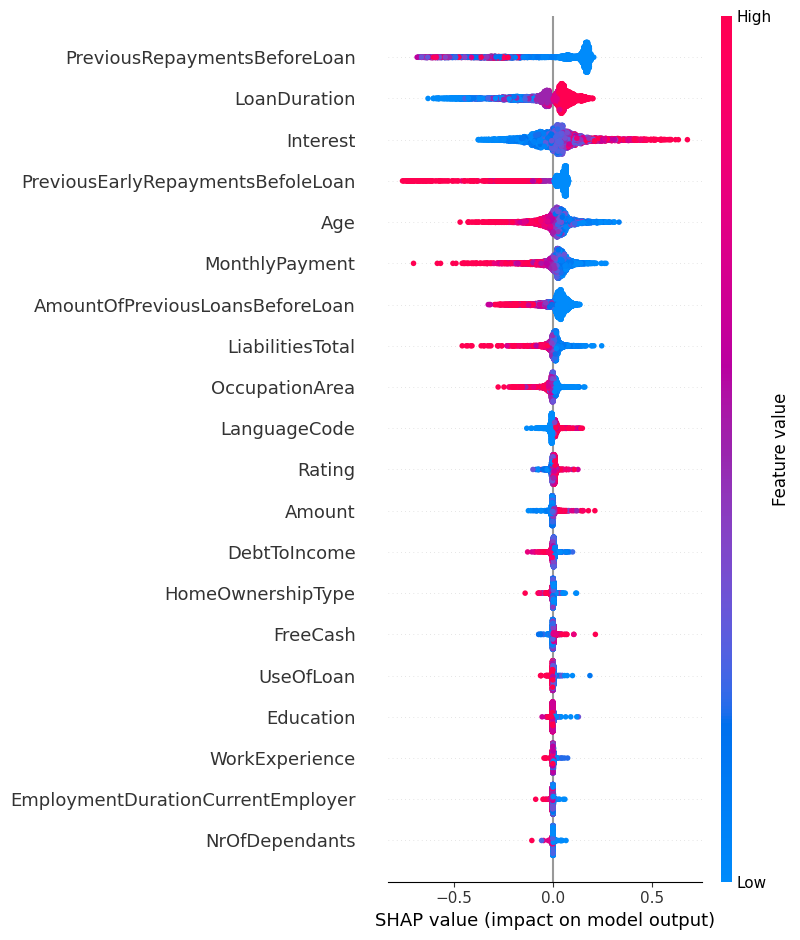

In [ ]:
shap.summary_plot(shap_values, X_test)

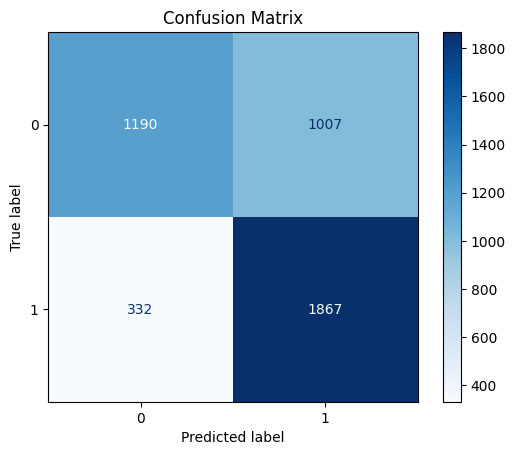

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test,Y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_test))
disp.plot(cmap=plt.cm.Blues)

# Customize the plot (optional)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from xgboost import XGBClassifier

rnft=XGBClassifier(rando_state=42)
rnft.fit(X_train,Y_train)
Y_pred=rnft.predict(X_test)
a_xgb=accuracy_score(Y_test,Y_pred)
p_xgb=precision_score(Y_test,Y_pred)
r_xgb=recall_score(Y_test,Y_pred)
f1_xgb=f1_score(Y_test,Y_pred)
print("XGBoost :")
print("accuracy:",a_xgb)
print('precision',p_xgb)
print('recall',r_xgb)
print('f1',f1_xgb)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "rando_state" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost :
accuracy: 0.7540946314831665
precision 0.7382779198635976
recall 0.787630741246021
f1 0.7621562156215621


PermutationExplainer explainer: 4397it [17:01,  4.26it/s]


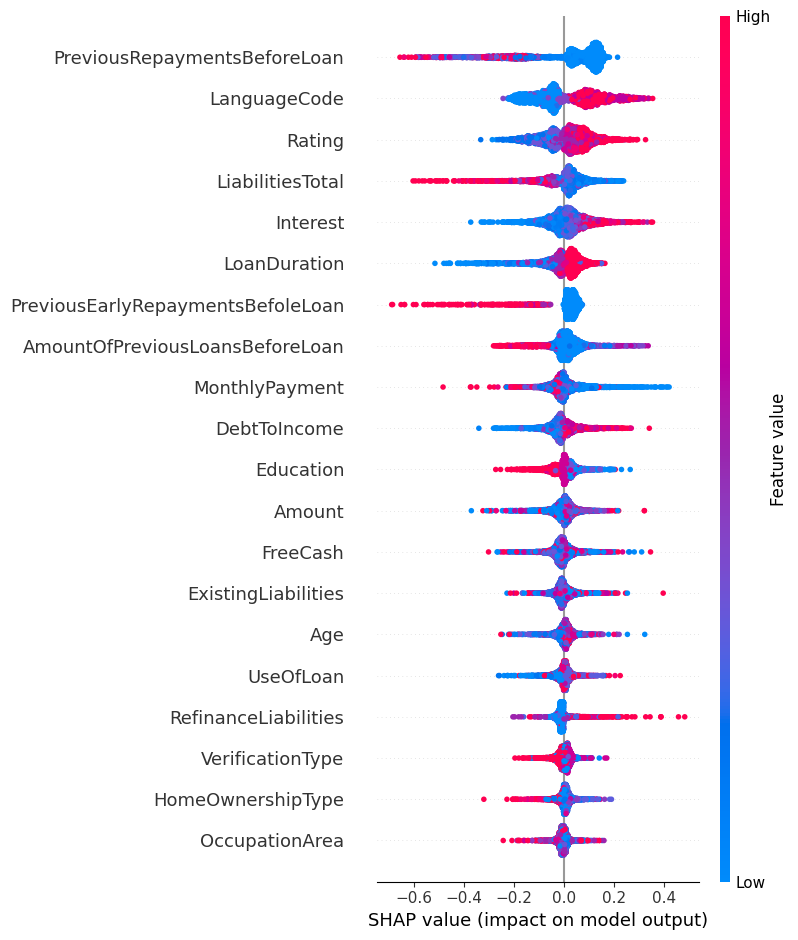

In [ ]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

# Instead of passing the model directly, pass the prediction function:
explainer = shap.Explainer(rnft.predict, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test,Y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_test))
disp.plot(cmap=plt.cm.Blues)

# Customize the plot (optional)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#XGBoost IRR

In [ ]:
combined_df = pd.DataFrame({
    'Amount':X_test['Amount'],
    'True_Label': Y_test,
    'Predicted_Label': Y_pred,
    'LoanDuration':X_test['LoanDuration'],
    'MonthlyPayment':X_test['MonthlyPayment']
})
print(combined_df.shape)
combined_df.head()

In [ ]:
misclassified = combined_df[(combined_df['True_Label'] != combined_df['Predicted_Label']) & (combined_df['True_Label']==1) & (combined_df['Predicted_Label']==0)]

print("Misclassified Samples:")
print(misclassified)

In [ ]:
!pip install numpy-financial

In [ ]:
import numpy_financial as npf
import pandas as pd


# Function to generate cash flows and calculate IRR
def calculate_loan_irr(amount, loan_duration, monthly_payment):
    # Initial cash flow is the loan amount (outflow)
    cash_flows = [-amount]

    # Monthly payments are cash inflows
    cash_flows.extend([monthly_payment] * int(loan_duration))

    # Calculate IRR
    try:
        irr = npf.irr(cash_flows) * 12  # Annualize the IRR
    except:
        irr = None  # In case IRR cannot be calculated

    return irr

# Apply the function to each row
misclassified['IRR'] = misclassified.apply(lambda row: calculate_loan_irr(row['Amount'], row['LoanDuration'], row['MonthlyPayment']), axis=1)

# Show the results
print(misclassified[['Amount', 'LoanDuration', 'MonthlyPayment', 'IRR']])


In [ ]:
misclassified['IRR'].describe()

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rnft=RandomForestClassifier()
rnft.fit(X_train,Y_train)
Y_pred=rnft.predict(X_test)
a_rf=accuracy_score(Y_test,Y_pred)
p_rf=precision_score(Y_test,Y_pred)
r_rf=recall_score(Y_test,Y_pred)
f1_rf=f1_score(Y_test,Y_pred)
print("Random forest :")
print("accuracy:",a_rf)
print('precision',p_rf)
print('recall',r_rf)
print('f1',f1_rf)

Random forest :
accuracy: 0.7513648771610555
precision 0.7373390557939914
recall 0.7812642110050023
f1 0.7586663722676087


PermutationExplainer explainer: 4397it [46:10,  1.58it/s]


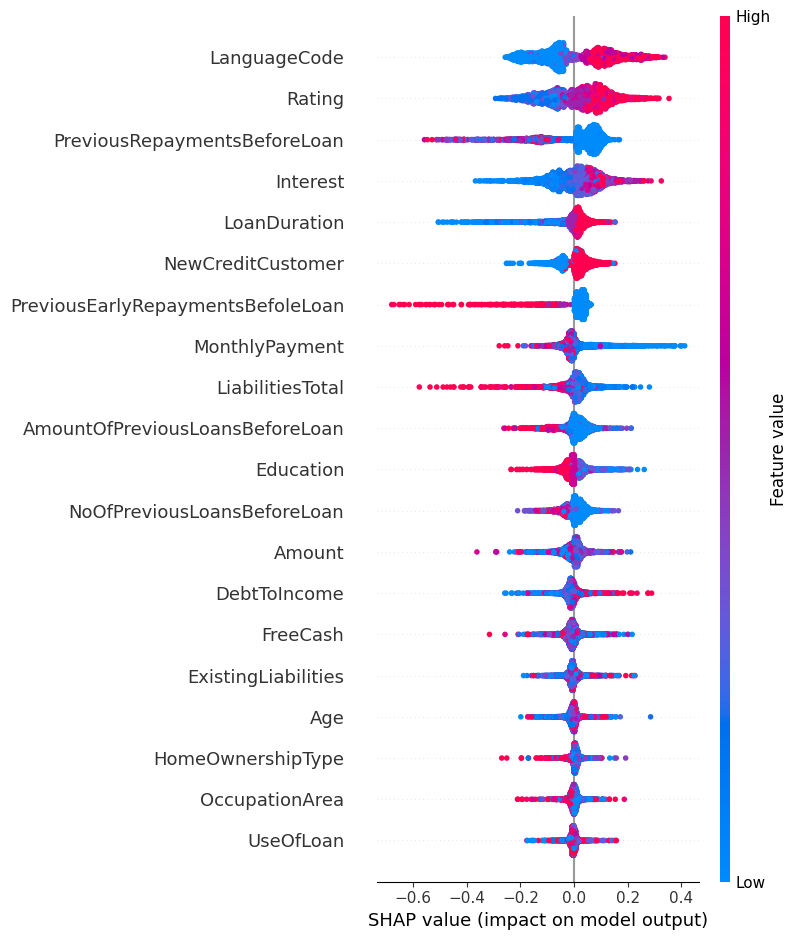

In [ ]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

# Instead of passing the model directly, pass the prediction function:
explainer = shap.Explainer(rnft.predict, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test,Y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_test))
disp.plot(cmap=plt.cm.Blues)

# Customize the plot (optional)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dm=pd.DataFrame({'Model':[ 'Logistic Regression', 'Random Forest', 'XGBoost'],'Precision':[ p_lr,p_rf,p_xgb],'Recall': [r_lr,r_rf,r_xgb],'F1': [f1_lr,f1_rf,f1_xgb]})


In [ ]:
df_melt=dm.melt(id_vars='Model',var_name='Metric',value_name='score')
plt.figure(figsize=(10,6))
sns.barplot(x='Model',y='score',hue='Metric',data=df_melt)
plt.ylabel('score')
plt.xlabel('model')
plt.ylim(0,1)
plt.legend(loc='best')
plt.show()

In [ ]:
#RF IRR

In [ ]:
combined_df = pd.DataFrame({
    'Amount':X_test['Amount'],
    'True_Label': Y_test,
    'Predicted_Label': Y_pred,
    'LoanDuration':X_test['LoanDuration'],
    'MonthlyPayment':X_test['MonthlyPayment']
})
print(combined_df.shape)
combined_df.head()

In [ ]:
misclassified = combined_df[(combined_df['True_Label'] != combined_df['Predicted_Label']) & (combined_df['True_Label']==1) & (combined_df['Predicted_Label']==0)]

print("Misclassified Samples:")
print(misclassified)

In [ ]:
!pip install numpy-financial

In [ ]:
import numpy_financial as npf
import pandas as pd


# Function to generate cash flows and calculate IRR
def calculate_loan_irr(amount, loan_duration, monthly_payment):
    # Initial cash flow is the loan amount (outflow)
    cash_flows = [-amount]

    # Monthly payments are cash inflows
    cash_flows.extend([monthly_payment] * int(loan_duration))

    # Calculate IRR
    try:
        irr = npf.irr(cash_flows) * 12  # Annualize the IRR
    except:
        irr = None  # In case IRR cannot be calculated

    return irr

# Apply the function to each row
misclassified['IRR'] = misclassified.apply(lambda row: calculate_loan_irr(row['Amount'], row['LoanDuration'], row['MonthlyPayment']), axis=1)

# Show the results
print(misclassified[['Amount', 'LoanDuration', 'MonthlyPayment', 'IRR']])


In [ ]:
misclassified['IRR'].describe()

In [ ]:
!pip install pytorch-tabnet

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the TabNet model
tabnet_model = TabNetClassifier(seed=42)

# Train the model
tabnet_model.fit(X_train.values, Y_train.values, max_epochs=50, patience=10, batch_size=256, virtual_batch_size=128)

# Predict on the test set
Y_pred_tabnet = tabnet_model.predict(X_test.values)

# Calculate performance metrics
a_tabnet = accuracy_score(Y_test, Y_pred_tabnet)
p_tabnet = precision_score(Y_test, Y_pred_tabnet)
r_tabnet = recall_score(Y_test, Y_pred_tabnet)
f1_tabnet = f1_score(Y_test, Y_pred_tabnet)

# Display results
print("\nTabNet:")
print("Accuracy:", a_tabnet)
print("Precision:", p_tabnet)
print("Recall:", r_tabnet)
print("F1 Score:", f1_tabnet)


In [ ]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

# Instead of passing the model directly, pass the prediction function:
explainer = shap.Explainer(tabnet_model.predict, X_test.values)  # Pass X_test.values instead of X_test_df
shap_values = explainer(X_test.values) # Pass X_test.values instead of X_test_df
shap.summary_plot(shap_values, X_test) # Retain X_test (DataFrame) for feature names in the plot

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred_tabnet)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_test))
disp.plot(cmap=plt.cm.Blues)

# Customize the plot (optional) Tabnet
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#TabNetClassifier IRR

In [ ]:
combined_df = pd.DataFrame({
    'Amount':X_test['Amount'],
    'True_Label': Y_test,
    'Predicted_Label': Y_pred,
    'LoanDuration':X_test['LoanDuration'],
    'MonthlyPayment':X_test['MonthlyPayment']
})
print(combined_df.shape)
combined_df.head()

In [ ]:
misclassified = combined_df[(combined_df['True_Label'] != combined_df['Predicted_Label']) & (combined_df['True_Label']==1) & (combined_df['Predicted_Label']==0)]

print("Misclassified Samples:")
print(misclassified)

In [ ]:
!pip install numpy-financial

In [ ]:
import numpy_financial as npf
import pandas as pd


# Function to generate cash flows and calculate IRR
def calculate_loan_irr(amount, loan_duration, monthly_payment):
    # Initial cash flow is the loan amount (outflow)
    cash_flows = [-amount]

    # Monthly payments are cash inflows
    cash_flows.extend([monthly_payment] * int(loan_duration))

    # Calculate IRR
    try:
        irr = npf.irr(cash_flows) * 12  # Annualize the IRR
    except:
        irr = None  # In case IRR cannot be calculated

    return irr

# Apply the function to each row
misclassified['IRR'] = misclassified.apply(lambda row: calculate_loan_irr(row['Amount'], row['LoanDuration'], row['MonthlyPayment']), axis=1)

# Show the results
print(misclassified[['Amount', 'LoanDuration', 'MonthlyPayment', 'IRR']])


In [ ]:
misclassified['IRR'].describe()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

nn_model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),  # Input layer with 256 neurons
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='relu'),                              # First hidden layer with 128 neurons
    BatchNormalization(),

    Dense(128, activation='relu'),                              # Second hidden layer with 128 neurons
    BatchNormalization(),

    Dense(64, activation='relu'),                               # Third hidden layer with 64 neurons
    BatchNormalization(),

    Dense(32, activation='relu'),                               # Fourth hidden layer with 32 neurons
    BatchNormalization(),
    Dropout(0.1),

    Dense(16, activation='relu'),                               # Fifth hidden layer with 16 neurons
    BatchNormalization(),
    Dropout(0.1),

    Dense(1, activation='sigmoid')                              # Output layer for binary classification
])


# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, Y_train, epochs=50, batch_size=32)

# Predict on test set
Y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32").flatten()

# Calculate performance metrics
a_nn = accuracy_score(Y_test, Y_pred_nn)
p_nn = precision_score(Y_test, Y_pred_nn)
r_nn = recall_score(Y_test, Y_pred_nn)
f1_nn = f1_score(Y_test, Y_pred_nn)

# Display results
print("\nNeural Network:")
print("Accuracy:", a_nn)
print("Precision:", p_nn)
print("Recall:", r_nn)
print("F1 Score:", f1_nn)


In [ ]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

# Instead of passing the model directly, pass the prediction function:
explainer = shap.Explainer(nn_model.predict, X_test.values)
shap_values = explainer(X_test.values)
shap.summary_plot(shap_values, X_test)

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   0%|          | 2/4396 [00:00<?, ?it/s]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   0%|          | 4/4396 [00:14<1:46:07,  1.45s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   0%|          | 5/4396 [00:17<2:24:50,  1.98s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   0%|          | 6/4396 [00:20<2:46:35,  2.28s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   0%|          | 7/4396 [00:23<3:15:54,  2.68s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   0%|          | 8/4396 [00:26<3:18:38,  2.72s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   0%|          | 9/4396 [00:29<3:21:54,  2.76s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   0%|          | 10/4396 [00:32<3:22:39,  2.77s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   0%|          | 11/4396 [00:35<3:41:59,  3.04s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   0%|          | 12/4396 [00:38<3:32:42,  2.91s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   0%|          | 13/4396 [00:41<3:33:09,  2.92s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   0%|          | 14/4396 [00:44<3:30:32,  2.88s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   0%|          | 15/4396 [00:47<3:51:19,  3.17s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   0%|          | 16/4396 [00:50<3:43:55,  3.07s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   0%|          | 17/4396 [00:53<3:36:05,  2.96s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   0%|          | 18/4396 [00:56<3:35:02,  2.95s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   0%|          | 19/4396 [01:00<3:52:03,  3.18s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   0%|          | 20/4396 [01:02<3:42:43,  3.05s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   0%|          | 21/4396 [01:05<3:41:07,  3.03s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 22/4396 [01:08<3:38:33,  3.00s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 23/4396 [01:12<3:54:16,  3.21s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|          | 24/4396 [01:15<3:51:55,  3.18s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 25/4396 [01:18<3:44:48,  3.09s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 26/4396 [01:21<3:41:42,  3.04s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|          | 27/4396 [01:24<3:46:32,  3.11s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|          | 28/4396 [01:27<3:37:28,  2.99s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|          | 29/4396 [01:29<3:31:23,  2.90s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|          | 30/4396 [01:32<3:31:50,  2.91s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|          | 31/4396 [01:36<3:43:18,  3.07s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|          | 32/4396 [01:39<3:36:26,  2.98s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 33/4396 [01:42<3:34:37,  2.95s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 34/4396 [01:44<3:32:44,  2.93s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|          | 35/4396 [01:48<3:42:04,  3.06s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 36/4396 [01:51<3:42:55,  3.07s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|          | 37/4396 [01:53<3:29:52,  2.89s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 38/4396 [01:56<3:34:18,  2.95s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|          | 39/4396 [02:00<3:46:40,  3.12s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 40/4396 [02:03<3:41:45,  3.05s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 41/4396 [02:06<3:39:23,  3.02s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 42/4396 [02:09<3:44:29,  3.09s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|          | 43/4396 [02:12<3:47:10,  3.13s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|          | 44/4396 [02:15<3:42:54,  3.07s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 45/4396 [02:18<3:37:02,  2.99s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 46/4396 [02:22<3:53:51,  3.23s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 47/4396 [02:24<3:43:21,  3.08s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 48/4396 [02:27<3:39:54,  3.03s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 49/4396 [02:30<3:35:20,  2.97s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|          | 50/4396 [02:34<3:56:06,  3.26s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 51/4396 [02:37<3:47:34,  3.14s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|          | 52/4396 [02:40<3:39:59,  3.04s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|          | 53/4396 [02:43<3:35:56,  2.98s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|          | 54/4396 [02:46<3:52:36,  3.21s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 55/4396 [02:49<3:41:54,  3.07s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 56/4396 [02:52<3:38:45,  3.02s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|▏         | 57/4396 [02:55<3:37:32,  3.01s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 58/4396 [02:59<3:54:52,  3.25s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|▏         | 59/4396 [03:02<3:50:16,  3.19s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|▏         | 60/4396 [03:05<3:46:43,  3.14s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|▏         | 61/4396 [03:08<3:42:44,  3.08s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 62/4396 [03:11<3:52:06,  3.21s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 63/4396 [03:14<3:44:10,  3.10s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|▏         | 64/4396 [03:17<3:41:54,  3.07s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   1%|▏         | 65/4396 [03:21<3:53:07,  3.23s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 66/4396 [03:24<3:43:24,  3.10s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 67/4396 [03:26<3:37:29,  3.01s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 68/4396 [03:29<3:33:33,  2.96s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 69/4396 [03:33<3:52:27,  3.22s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 70/4396 [03:36<3:43:57,  3.11s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 71/4396 [03:39<3:37:33,  3.02s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 72/4396 [03:42<3:35:28,  2.99s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 73/4396 [03:46<4:00:31,  3.34s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 74/4396 [03:49<3:51:27,  3.21s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 75/4396 [03:51<3:36:39,  3.01s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 76/4396 [03:54<3:35:06,  2.99s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 77/4396 [03:58<3:58:05,  3.31s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 78/4396 [04:01<3:53:47,  3.25s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 79/4396 [04:04<3:44:13,  3.12s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 80/4396 [04:08<3:51:13,  3.21s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 81/4396 [04:11<3:52:11,  3.23s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 82/4396 [04:14<3:44:50,  3.13s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 83/4396 [04:17<3:39:03,  3.05s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   2%|▏         | 84/4396 [04:21<4:02:20,  3.37s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 85/4396 [04:25<4:21:41,  3.64s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 86/4396 [04:28<4:06:35,  3.43s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 87/4396 [04:31<3:55:29,  3.28s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 88/4396 [04:35<4:11:45,  3.51s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 89/4396 [04:38<3:55:55,  3.29s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 90/4396 [04:41<3:46:38,  3.16s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 91/4396 [04:43<3:35:45,  3.01s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 92/4396 [04:47<3:55:02,  3.28s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 93/4396 [04:51<3:56:32,  3.30s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 94/4396 [04:53<3:46:38,  3.16s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 95/4396 [04:57<3:50:45,  3.22s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 96/4396 [05:00<3:59:05,  3.34s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 97/4396 [05:03<3:49:45,  3.21s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 98/4396 [05:06<3:38:51,  3.06s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 99/4396 [05:09<3:48:17,  3.19s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 100/4396 [05:13<3:50:13,  3.22s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 101/4396 [05:16<3:43:40,  3.12s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 102/4396 [05:18<3:36:18,  3.02s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 103/4396 [05:22<3:52:10,  3.24s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 104/4396 [05:25<3:47:55,  3.19s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 105/4396 [05:28<3:40:23,  3.08s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 106/4396 [05:31<3:33:59,  2.99s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 107/4396 [05:35<3:50:15,  3.22s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 108/4396 [05:38<3:45:13,  3.15s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 109/4396 [05:41<3:44:15,  3.14s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 110/4396 [05:44<3:40:49,  3.09s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 111/4396 [05:48<4:01:27,  3.38s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 112/4396 [05:50<3:47:40,  3.19s/it]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 113/4396 [05:53<3:43:00,  3.12s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 114/4396 [05:57<3:56:48,  3.32s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 115/4396 [06:01<3:58:45,  3.35s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 116/4396 [06:03<3:47:18,  3.19s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 117/4396 [06:06<3:39:26,  3.08s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 118/4396 [06:10<4:01:54,  3.39s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 119/4396 [06:13<3:48:35,  3.21s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 120/4396 [06:16<3:42:00,  3.12s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 121/4396 [06:19<3:35:52,  3.03s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 122/4396 [06:23<4:00:27,  3.38s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 123/4396 [06:26<3:53:13,  3.27s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 124/4396 [06:29<3:42:29,  3.12s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 125/4396 [06:32<3:35:22,  3.03s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 126/4396 [06:36<3:53:59,  3.29s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 127/4396 [06:39<3:47:21,  3.20s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 128/4396 [06:42<3:51:57,  3.26s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 129/4396 [06:46<4:02:54,  3.42s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 130/4396 [06:49<3:54:29,  3.30s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 131/4396 [06:52<3:44:06,  3.15s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 132/4396 [06:55<3:39:03,  3.08s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 133/4396 [06:58<3:55:59,  3.32s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 134/4396 [07:01<3:49:59,  3.24s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 135/4396 [07:04<3:41:41,  3.12s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 136/4396 [07:07<3:37:33,  3.06s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 137/4396 [07:11<3:57:01,  3.34s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 138/4396 [07:14<3:52:21,  3.27s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 139/4396 [07:17<3:47:17,  3.20s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 140/4396 [07:22<4:11:02,  3.54s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 141/4396 [07:25<4:00:07,  3.39s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 142/4396 [07:28<3:54:44,  3.31s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 143/4396 [07:31<3:46:32,  3.20s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 144/4396 [07:35<4:03:05,  3.43s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 145/4396 [07:38<3:49:23,  3.24s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 146/4396 [07:41<3:46:37,  3.20s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   3%|▎         | 147/4396 [07:44<3:43:54,  3.16s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 148/4396 [07:48<4:05:23,  3.47s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 149/4396 [07:51<3:55:29,  3.33s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 150/4396 [07:54<3:49:26,  3.24s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 151/4396 [07:58<4:10:59,  3.55s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 152/4396 [08:01<3:57:42,  3.36s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 153/4396 [08:04<3:46:46,  3.21s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▎         | 154/4396 [08:07<3:45:09,  3.18s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▎         | 155/4396 [08:11<4:02:00,  3.42s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▎         | 156/4396 [08:14<3:54:01,  3.31s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▎         | 157/4396 [08:17<3:44:44,  3.18s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▎         | 158/4396 [08:20<3:41:20,  3.13s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▎         | 159/4396 [08:24<3:54:27,  3.32s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 160/4396 [08:27<3:45:55,  3.20s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▎         | 161/4396 [08:30<3:40:12,  3.12s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▎         | 162/4396 [08:33<3:52:46,  3.30s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 163/4396 [08:37<3:50:46,  3.27s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▎         | 164/4396 [08:39<3:41:52,  3.15s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 165/4396 [08:43<3:49:54,  3.26s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 166/4396 [08:47<4:00:14,  3.41s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 167/4396 [08:50<3:52:15,  3.30s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 168/4396 [08:53<3:45:28,  3.20s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 169/4396 [08:55<3:36:30,  3.07s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 170/4396 [08:59<3:54:35,  3.33s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 171/4396 [09:02<3:41:14,  3.14s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 172/4396 [09:05<3:36:02,  3.07s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   4%|▍         | 173/4396 [09:09<3:44:47,  3.19s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 174/4396 [09:12<3:49:04,  3.26s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 175/4396 [09:15<3:45:35,  3.21s/it]

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 176/4396 [09:18<3:41:17,  3.15s/it]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   4%|▍         | 177/4396 [09:22<3:48:36,  3.25s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 178/4396 [09:25<3:47:37,  3.24s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 179/4396 [09:28<3:49:24,  3.26s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 180/4396 [09:31<3:39:48,  3.13s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 181/4396 [09:35<4:00:41,  3.43s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 182/4396 [09:38<3:56:15,  3.36s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 183/4396 [09:41<3:46:28,  3.23s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 184/4396 [09:44<3:42:41,  3.17s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 185/4396 [09:48<3:56:35,  3.37s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 186/4396 [09:51<3:50:06,  3.28s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 187/4396 [09:54<3:43:59,  3.19s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 188/4396 [09:58<4:05:18,  3.50s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 189/4396 [10:01<3:50:48,  3.29s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 190/4396 [10:04<3:41:40,  3.16s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 191/4396 [10:07<3:40:09,  3.14s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 192/4396 [10:11<3:51:54,  3.31s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 193/4396 [10:14<3:44:39,  3.21s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 194/4396 [10:16<3:35:48,  3.08s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 195/4396 [10:20<3:42:02,  3.17s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 196/4396 [10:24<3:53:34,  3.34s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 197/4396 [10:27<3:55:28,  3.36s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 198/4396 [10:30<3:46:51,  3.24s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 199/4396 [10:34<3:58:19,  3.41s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 200/4396 [10:37<3:49:49,  3.29s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 201/4396 [10:40<3:43:03,  3.19s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 202/4396 [10:43<3:41:50,  3.17s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 203/4396 [10:47<3:56:17,  3.38s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 204/4396 [10:50<3:59:02,  3.42s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 205/4396 [10:53<3:51:42,  3.32s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 206/4396 [10:56<3:45:06,  3.22s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 207/4396 [11:00<3:59:51,  3.44s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 208/4396 [11:03<3:51:09,  3.31s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 209/4396 [11:06<3:42:59,  3.20s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   5%|▍         | 210/4396 [11:09<3:43:15,  3.20s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 211/4396 [11:13<3:53:53,  3.35s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 212/4396 [11:16<3:50:04,  3.30s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 213/4396 [11:20<3:48:38,  3.28s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 214/4396 [11:24<4:04:47,  3.51s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 215/4396 [11:27<3:56:58,  3.40s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 216/4396 [11:29<3:43:54,  3.21s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 217/4396 [11:32<3:36:06,  3.10s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 218/4396 [11:36<3:53:48,  3.36s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 219/4396 [11:39<3:48:34,  3.28s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 220/4396 [11:43<3:55:13,  3.38s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 221/4396 [11:47<4:12:46,  3.63s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 222/4396 [11:50<4:01:52,  3.48s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 223/4396 [11:53<3:52:45,  3.35s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 224/4396 [11:57<4:04:09,  3.51s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 225/4396 [12:01<4:13:51,  3.65s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 226/4396 [12:04<4:01:04,  3.47s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 227/4396 [12:07<3:52:32,  3.35s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 228/4396 [12:12<4:15:26,  3.68s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 229/4396 [12:15<4:02:05,  3.49s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 230/4396 [12:18<3:49:13,  3.30s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 231/4396 [12:21<3:44:04,  3.23s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 232/4396 [12:25<4:03:27,  3.51s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 233/4396 [12:28<3:53:55,  3.37s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 234/4396 [12:31<3:52:29,  3.35s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   5%|▌         | 235/4396 [12:36<4:12:36,  3.64s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 236/4396 [12:39<3:58:57,  3.45s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 237/4396 [12:42<3:49:31,  3.31s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 238/4396 [12:45<3:45:28,  3.25s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 239/4396 [12:49<4:04:05,  3.52s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 240/4396 [12:52<3:59:28,  3.46s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 241/4396 [12:55<3:52:29,  3.36s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 242/4396 [12:59<3:51:55,  3.35s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 243/4396 [13:02<3:52:58,  3.37s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 244/4396 [13:05<3:42:11,  3.21s/it]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 245/4396 [13:09<3:51:24,  3.34s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 246/4396 [13:13<4:06:34,  3.56s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 247/4396 [13:16<4:03:38,  3.52s/it]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 248/4396 [13:20<4:02:36,  3.51s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 249/4396 [13:24<4:18:47,  3.74s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 250/4396 [13:27<4:05:41,  3.56s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 251/4396 [13:30<3:54:45,  3.40s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 252/4396 [13:33<3:49:27,  3.32s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 253/4396 [13:37<3:58:06,  3.45s/it]

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 254/4396 [13:40<3:52:27,  3.37s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 255/4396 [13:43<3:46:59,  3.29s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 256/4396 [13:46<3:38:04,  3.16s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 257/4396 [13:50<3:51:29,  3.36s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 258/4396 [13:53<3:41:29,  3.21s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 259/4396 [13:56<3:39:49,  3.19s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   6%|▌         | 260/4396 [13:59<3:46:52,  3.29s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 261/4396 [14:03<3:47:50,  3.31s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 262/4396 [14:06<3:42:58,  3.24s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 263/4396 [14:09<3:36:54,  3.15s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 264/4396 [14:12<3:47:32,  3.30s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 265/4396 [14:15<3:38:07,  3.17s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 266/4396 [14:18<3:30:15,  3.05s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 267/4396 [14:21<3:28:40,  3.03s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 268/4396 [14:24<3:38:01,  3.17s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 269/4396 [14:27<3:33:54,  3.11s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 270/4396 [14:31<3:43:11,  3.25s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   6%|▌         | 271/4396 [14:36<4:26:51,  3.88s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 272/4396 [14:39<4:11:05,  3.65s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 273/4396 [14:43<4:00:26,  3.50s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 274/4396 [14:45<3:46:41,  3.30s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▋         | 275/4396 [14:49<3:59:06,  3.48s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▋         | 276/4396 [14:52<3:50:14,  3.35s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 277/4396 [14:55<3:39:39,  3.20s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▋         | 278/4396 [14:58<3:39:27,  3.20s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▋         | 279/4396 [15:03<4:01:23,  3.52s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▋         | 280/4396 [15:06<3:53:18,  3.40s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▋         | 281/4396 [15:09<3:43:59,  3.27s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▋         | 282/4396 [15:14<4:16:27,  3.74s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▋         | 283/4396 [15:17<4:01:00,  3.52s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▋         | 284/4396 [15:20<3:51:24,  3.38s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▋         | 285/4396 [15:23<3:40:08,  3.21s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 286/4396 [15:27<3:56:43,  3.46s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 287/4396 [15:30<3:47:26,  3.32s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 288/4396 [15:33<3:41:03,  3.23s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   7%|▋         | 289/4396 [15:36<3:48:13,  3.33s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 290/4396 [15:40<4:00:38,  3.52s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 291/4396 [15:43<3:53:27,  3.41s/it]

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 292/4396 [15:47<3:52:31,  3.40s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 293/4396 [15:50<4:01:47,  3.54s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 294/4396 [15:54<3:52:07,  3.40s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 295/4396 [15:56<3:38:56,  3.20s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 296/4396 [15:59<3:30:57,  3.09s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 297/4396 [16:03<3:44:22,  3.28s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 298/4396 [16:06<3:48:32,  3.35s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 299/4396 [16:10<4:00:11,  3.52s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 300/4396 [16:14<4:13:45,  3.72s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 301/4396 [16:18<4:01:32,  3.54s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 302/4396 [16:21<3:50:04,  3.37s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 303/4396 [16:24<3:45:10,  3.30s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 304/4396 [16:27<3:53:01,  3.42s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 305/4396 [16:31<4:00:55,  3.53s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 306/4396 [16:34<3:52:27,  3.41s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 307/4396 [16:39<4:08:28,  3.65s/it]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 308/4396 [16:41<3:54:30,  3.44s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 309/4396 [16:45<3:51:37,  3.40s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 310/4396 [16:48<3:47:30,  3.34s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 311/4396 [16:52<3:57:48,  3.49s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 312/4396 [16:55<3:50:19,  3.38s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 313/4396 [16:58<3:48:26,  3.36s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   7%|▋         | 314/4396 [17:02<3:56:25,  3.48s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 315/4396 [17:05<3:49:26,  3.37s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 316/4396 [17:08<3:43:17,  3.28s/it]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 317/4396 [17:12<3:53:23,  3.43s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 318/4396 [17:16<4:05:08,  3.61s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 319/4396 [17:19<3:51:58,  3.41s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 320/4396 [17:22<3:49:38,  3.38s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   7%|▋         | 321/4396 [17:26<4:05:42,  3.62s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 322/4396 [17:30<3:54:08,  3.45s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 323/4396 [17:33<3:47:52,  3.36s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 324/4396 [17:35<3:36:09,  3.18s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 325/4396 [17:40<3:59:05,  3.52s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 326/4396 [17:43<3:56:03,  3.48s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 327/4396 [17:46<3:53:32,  3.44s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   7%|▋         | 328/4396 [17:50<3:53:34,  3.44s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 329/4396 [17:54<4:01:51,  3.57s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 330/4396 [17:57<3:50:56,  3.41s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 331/4396 [18:00<3:50:11,  3.40s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 332/4396 [18:04<4:03:32,  3.60s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 333/4396 [18:08<3:59:17,  3.53s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 334/4396 [18:11<3:49:20,  3.39s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   8%|▊         | 335/4396 [18:15<3:58:35,  3.53s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 336/4396 [18:19<4:10:11,  3.70s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 337/4396 [18:22<3:58:44,  3.53s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 338/4396 [18:25<3:58:39,  3.53s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 339/4396 [18:29<4:11:12,  3.72s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 340/4396 [18:32<3:54:00,  3.46s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 341/4396 [18:35<3:44:32,  3.32s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 342/4396 [18:38<3:34:52,  3.18s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 343/4396 [18:42<3:54:37,  3.47s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 344/4396 [18:45<3:42:53,  3.30s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 345/4396 [18:48<3:35:31,  3.19s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 346/4396 [18:52<3:51:59,  3.44s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 347/4396 [18:55<3:45:15,  3.34s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 348/4396 [18:58<3:38:07,  3.23s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 349/4396 [19:01<3:36:55,  3.22s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 350/4396 [19:05<3:50:52,  3.42s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 351/4396 [19:08<3:39:09,  3.25s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 352/4396 [19:11<3:31:53,  3.14s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 353/4396 [19:14<3:29:29,  3.11s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 354/4396 [19:19<3:56:52,  3.52s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 355/4396 [19:22<3:47:30,  3.38s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 356/4396 [19:25<3:43:07,  3.31s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 357/4396 [19:28<3:46:59,  3.37s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 358/4396 [19:32<3:46:50,  3.37s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 359/4396 [19:35<3:45:04,  3.35s/it]

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 360/4396 [19:38<3:40:54,  3.28s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 361/4396 [19:42<3:58:24,  3.54s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 362/4396 [19:45<3:47:15,  3.38s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 363/4396 [19:48<3:40:10,  3.28s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 364/4396 [19:52<3:55:00,  3.50s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 365/4396 [19:56<3:53:44,  3.48s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 366/4396 [19:59<3:46:38,  3.37s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 367/4396 [20:02<3:39:51,  3.27s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 368/4396 [20:06<3:55:41,  3.51s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 369/4396 [20:09<3:48:55,  3.41s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 370/4396 [20:12<3:40:55,  3.29s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 371/4396 [20:15<3:35:33,  3.21s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 372/4396 [20:20<4:00:55,  3.59s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 373/4396 [20:23<3:58:33,  3.56s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▊         | 374/4396 [20:26<3:52:13,  3.46s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▊         | 375/4396 [20:30<4:02:07,  3.61s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▊         | 376/4396 [20:34<3:56:02,  3.52s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▊         | 377/4396 [20:37<3:45:28,  3.37s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▊         | 378/4396 [20:40<3:39:33,  3.28s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▊         | 379/4396 [20:44<3:57:46,  3.55s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▊         | 380/4396 [20:47<3:48:31,  3.41s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▊         | 381/4396 [20:50<3:49:24,  3.43s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   9%|▊         | 382/4396 [20:55<4:06:53,  3.69s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▊         | 383/4396 [20:58<3:52:41,  3.48s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▊         | 384/4396 [21:01<3:42:55,  3.33s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 385/4396 [21:04<3:35:11,  3.22s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 386/4396 [21:08<3:53:24,  3.49s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 387/4396 [21:11<3:48:36,  3.42s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 388/4396 [21:14<3:39:00,  3.28s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   9%|▉         | 389/4396 [21:17<3:35:12,  3.22s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 390/4396 [21:21<3:48:29,  3.42s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 391/4396 [21:24<3:44:41,  3.37s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 392/4396 [21:28<3:47:26,  3.41s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   9%|▉         | 393/4396 [21:32<4:00:53,  3.61s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 394/4396 [21:35<3:57:43,  3.56s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 395/4396 [21:38<3:47:55,  3.42s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 396/4396 [21:41<3:41:25,  3.32s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 397/4396 [21:45<3:53:00,  3.50s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 398/4396 [21:48<3:43:50,  3.36s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 399/4396 [21:51<3:36:58,  3.26s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 400/4396 [21:56<4:04:22,  3.67s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 401/4396 [21:59<3:53:28,  3.51s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 402/4396 [22:02<3:44:31,  3.37s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 403/4396 [22:05<3:41:31,  3.33s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 404/4396 [22:10<3:58:38,  3.59s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 405/4396 [22:13<3:44:33,  3.38s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 406/4396 [22:15<3:33:52,  3.22s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   9%|▉         | 407/4396 [22:18<3:29:51,  3.16s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 408/4396 [22:22<3:36:22,  3.26s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 409/4396 [22:25<3:31:55,  3.19s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 410/4396 [22:28<3:24:23,  3.08s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   9%|▉         | 411/4396 [22:32<3:51:06,  3.48s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 412/4396 [22:36<3:55:39,  3.55s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 413/4396 [22:39<3:46:28,  3.41s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 414/4396 [22:42<3:37:25,  3.28s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 415/4396 [22:46<3:51:38,  3.49s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 416/4396 [22:50<3:55:38,  3.55s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 417/4396 [22:53<3:48:12,  3.44s/it]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 418/4396 [22:57<4:06:31,  3.72s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 419/4396 [23:00<3:54:39,  3.54s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 420/4396 [23:03<3:43:13,  3.37s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 421/4396 [23:06<3:36:13,  3.26s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 422/4396 [23:10<3:54:40,  3.54s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 423/4396 [23:13<3:43:12,  3.37s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 424/4396 [23:17<3:43:54,  3.38s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  10%|▉         | 425/4396 [23:20<3:40:55,  3.34s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 426/4396 [23:24<3:49:52,  3.47s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 427/4396 [23:27<3:38:54,  3.31s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 428/4396 [23:30<3:35:01,  3.25s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 429/4396 [23:34<3:52:03,  3.51s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 430/4396 [23:37<3:43:16,  3.38s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 431/4396 [23:40<3:38:36,  3.31s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 432/4396 [23:43<3:32:04,  3.21s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 433/4396 [23:47<3:49:46,  3.48s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 434/4396 [23:50<3:37:54,  3.30s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 435/4396 [23:53<3:34:39,  3.25s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  10%|▉         | 436/4396 [23:58<3:53:35,  3.54s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 437/4396 [24:01<3:47:12,  3.44s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 438/4396 [24:04<3:39:47,  3.33s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 439/4396 [24:07<3:43:22,  3.39s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 440/4396 [24:11<3:55:56,  3.58s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 441/4396 [24:15<3:48:19,  3.46s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 442/4396 [24:18<3:38:56,  3.32s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 443/4396 [24:21<3:31:45,  3.21s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 444/4396 [24:24<3:45:32,  3.42s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 445/4396 [24:27<3:32:52,  3.23s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 446/4396 [24:30<3:28:56,  3.17s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 447/4396 [24:34<3:42:13,  3.38s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 448/4396 [24:38<3:45:04,  3.42s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 449/4396 [24:41<3:37:53,  3.31s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 450/4396 [24:44<3:29:43,  3.19s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 451/4396 [24:48<3:53:26,  3.55s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 452/4396 [24:51<3:42:12,  3.38s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 453/4396 [24:54<3:35:11,  3.27s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 454/4396 [24:57<3:34:04,  3.26s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 455/4396 [25:01<3:49:57,  3.50s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 456/4396 [25:04<3:39:29,  3.34s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 457/4396 [25:07<3:30:49,  3.21s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  10%|█         | 458/4396 [25:11<3:38:01,  3.32s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 459/4396 [25:15<3:50:01,  3.51s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 460/4396 [25:18<3:40:06,  3.36s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 461/4396 [25:21<3:33:52,  3.26s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 462/4396 [25:25<3:54:40,  3.58s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 463/4396 [25:29<3:55:16,  3.59s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 464/4396 [25:32<3:56:23,  3.61s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  11%|█         | 465/4396 [25:36<4:02:20,  3.70s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 466/4396 [25:40<4:02:32,  3.70s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 467/4396 [25:43<3:52:23,  3.55s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 468/4396 [25:46<3:43:54,  3.42s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 469/4396 [25:50<3:55:48,  3.60s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 470/4396 [25:53<3:46:08,  3.46s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 471/4396 [25:57<3:42:05,  3.40s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 472/4396 [26:00<3:48:04,  3.49s/it]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 473/4396 [26:04<3:50:05,  3.52s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 474/4396 [26:07<3:40:42,  3.38s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 475/4396 [26:10<3:33:42,  3.27s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 476/4396 [26:14<3:54:12,  3.58s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 477/4396 [26:17<3:44:37,  3.44s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 478/4396 [26:20<3:36:45,  3.32s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 479/4396 [26:23<3:29:40,  3.21s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 480/4396 [26:27<3:40:14,  3.37s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 481/4396 [26:30<3:33:39,  3.27s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 482/4396 [26:34<3:43:33,  3.43s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  11%|█         | 483/4396 [26:38<3:56:28,  3.63s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 484/4396 [26:42<3:54:13,  3.59s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 485/4396 [26:45<3:52:30,  3.57s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 486/4396 [26:49<3:50:18,  3.53s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 487/4396 [26:53<4:02:45,  3.73s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 488/4396 [26:56<3:48:34,  3.51s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 489/4396 [26:59<3:39:44,  3.37s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 490/4396 [27:03<4:00:56,  3.70s/it]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 491/4396 [27:06<3:47:20,  3.49s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 492/4396 [27:09<3:39:04,  3.37s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 493/4396 [27:12<3:33:04,  3.28s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 494/4396 [27:17<3:53:41,  3.59s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█▏        | 495/4396 [27:20<3:45:09,  3.46s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█▏        | 496/4396 [27:23<3:37:04,  3.34s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  11%|█▏        | 497/4396 [27:27<3:44:28,  3.45s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█▏        | 498/4396 [27:30<3:42:30,  3.43s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█▏        | 499/4396 [27:33<3:36:52,  3.34s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█▏        | 500/4396 [27:36<3:32:50,  3.28s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█▏        | 501/4396 [27:40<3:49:48,  3.54s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█▏        | 502/4396 [27:44<3:41:40,  3.42s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█▏        | 503/4396 [27:47<3:44:12,  3.46s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  11%|█▏        | 504/4396 [27:50<3:36:45,  3.34s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█▏        | 505/4396 [27:54<3:45:25,  3.48s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 506/4396 [27:58<3:49:11,  3.54s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 507/4396 [28:01<3:43:43,  3.45s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 508/4396 [28:05<3:57:53,  3.67s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 509/4396 [28:08<3:46:53,  3.50s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 510/4396 [28:12<3:47:57,  3.52s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  12%|█▏        | 511/4396 [28:16<3:55:52,  3.64s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 512/4396 [28:20<4:03:35,  3.76s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 513/4396 [28:23<3:50:04,  3.56s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 514/4396 [28:26<3:43:07,  3.45s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 515/4396 [28:30<4:00:05,  3.71s/it]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  12%|█▏        | 516/4396 [28:35<4:13:16,  3.92s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 517/4396 [28:38<3:58:53,  3.70s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 518/4396 [28:42<4:08:27,  3.84s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 519/4396 [28:46<4:03:57,  3.78s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 520/4396 [28:49<3:51:36,  3.59s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  12%|█▏        | 521/4396 [28:53<4:05:57,  3.81s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 522/4396 [28:57<4:09:27,  3.86s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 523/4396 [29:00<3:54:28,  3.63s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 524/4396 [29:04<3:48:58,  3.55s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 525/4396 [29:08<4:04:05,  3.78s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 526/4396 [29:12<4:05:42,  3.81s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 527/4396 [29:15<3:51:00,  3.58s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 528/4396 [29:20<4:22:58,  4.08s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 529/4396 [29:23<4:03:30,  3.78s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 530/4396 [29:26<3:48:54,  3.55s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  12%|█▏        | 531/4396 [29:30<3:48:35,  3.55s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 532/4396 [29:34<3:56:54,  3.68s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 533/4396 [29:37<3:50:35,  3.58s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 534/4396 [29:41<3:48:18,  3.55s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 535/4396 [29:45<4:03:46,  3.79s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 536/4396 [29:48<3:52:02,  3.61s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 537/4396 [29:51<3:42:13,  3.46s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  12%|█▏        | 538/4396 [29:55<3:49:44,  3.57s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 539/4396 [29:59<4:00:07,  3.74s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 540/4396 [30:03<3:51:30,  3.60s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 541/4396 [30:06<3:49:41,  3.57s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 542/4396 [30:11<4:11:04,  3.91s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 543/4396 [30:14<4:05:17,  3.82s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 544/4396 [30:18<4:00:31,  3.75s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 545/4396 [30:22<4:11:04,  3.91s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 546/4396 [30:26<4:16:16,  3.99s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 547/4396 [30:30<4:07:47,  3.86s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 548/4396 [30:34<4:16:08,  3.99s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 549/4396 [30:37<4:00:16,  3.75s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 550/4396 [30:41<3:48:16,  3.56s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  13%|█▎        | 551/4396 [30:44<3:46:09,  3.53s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 552/4396 [30:48<3:50:54,  3.60s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 553/4396 [30:51<3:51:49,  3.62s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 554/4396 [30:55<3:44:05,  3.50s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 555/4396 [30:59<4:03:46,  3.81s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 556/4396 [31:03<3:57:23,  3.71s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 557/4396 [31:06<3:49:11,  3.58s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  13%|█▎        | 558/4396 [31:09<3:41:40,  3.47s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 559/4396 [31:13<3:51:32,  3.62s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 560/4396 [31:16<3:36:01,  3.38s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 561/4396 [31:19<3:30:26,  3.29s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  13%|█▎        | 562/4396 [31:23<3:46:44,  3.55s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 563/4396 [31:27<3:46:26,  3.54s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 564/4396 [31:30<3:49:49,  3.60s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 565/4396 [31:34<3:50:30,  3.61s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 566/4396 [31:39<4:08:24,  3.89s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 567/4396 [31:42<3:57:16,  3.72s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 568/4396 [31:45<3:43:53,  3.51s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 569/4396 [31:50<4:04:11,  3.83s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 570/4396 [31:53<4:01:46,  3.79s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 571/4396 [31:58<4:17:41,  4.04s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 572/4396 [32:02<4:22:36,  4.12s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 573/4396 [32:06<4:12:03,  3.96s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 574/4396 [32:09<4:01:14,  3.79s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 575/4396 [32:13<4:11:32,  3.95s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 576/4396 [32:17<3:58:19,  3.74s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 577/4396 [32:21<4:01:17,  3.79s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 578/4396 [32:24<3:48:27,  3.59s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 579/4396 [32:27<3:49:38,  3.61s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 580/4396 [32:31<3:40:44,  3.47s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 581/4396 [32:34<3:35:02,  3.38s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  13%|█▎        | 582/4396 [32:38<3:53:18,  3.67s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 583/4396 [32:42<4:03:40,  3.83s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 584/4396 [32:45<3:50:21,  3.63s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  13%|█▎        | 585/4396 [32:50<4:09:01,  3.92s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 586/4396 [32:53<3:55:13,  3.70s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  13%|█▎        | 587/4396 [32:57<3:51:34,  3.65s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 588/4396 [33:00<3:48:52,  3.61s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 589/4396 [33:04<4:00:31,  3.79s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 590/4396 [33:08<3:48:56,  3.61s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 591/4396 [33:11<3:40:31,  3.48s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 592/4396 [33:15<3:57:31,  3.75s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 593/4396 [33:18<3:46:18,  3.57s/it]

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 594/4396 [33:22<3:50:49,  3.64s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  14%|█▎        | 595/4396 [33:25<3:40:43,  3.48s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 596/4396 [33:29<3:50:41,  3.64s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 597/4396 [33:33<3:46:47,  3.58s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 598/4396 [33:36<3:48:53,  3.62s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 599/4396 [33:41<4:07:46,  3.92s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 600/4396 [33:44<3:59:09,  3.78s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 601/4396 [33:48<3:51:30,  3.66s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  14%|█▎        | 602/4396 [33:53<4:16:26,  4.06s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 603/4396 [33:56<3:59:21,  3.79s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 604/4396 [33:59<3:44:29,  3.55s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 605/4396 [34:02<3:36:56,  3.43s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 606/4396 [34:06<3:53:28,  3.70s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 607/4396 [34:10<3:40:43,  3.50s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  14%|█▍        | 608/4396 [34:13<3:36:32,  3.43s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  14%|█▍        | 609/4396 [34:17<3:47:18,  3.60s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 610/4396 [34:21<3:51:15,  3.66s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 611/4396 [34:24<3:43:09,  3.54s/it]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 612/4396 [34:27<3:31:17,  3.35s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 613/4396 [34:31<3:47:24,  3.61s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 614/4396 [34:34<3:44:23,  3.56s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 615/4396 [34:38<3:46:55,  3.60s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  14%|█▍        | 616/4396 [34:43<4:05:59,  3.90s/it]

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 617/4396 [34:46<3:57:27,  3.77s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 618/4396 [34:49<3:42:50,  3.54s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 619/4396 [34:52<3:35:21,  3.42s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 620/4396 [34:57<3:58:07,  3.78s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 621/4396 [35:00<3:46:44,  3.60s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 622/4396 [35:04<3:42:18,  3.53s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 623/4396 [35:08<3:58:16,  3.79s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 624/4396 [35:11<3:49:44,  3.65s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 625/4396 [35:15<3:56:14,  3.76s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 626/4396 [35:21<4:26:56,  4.25s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 627/4396 [35:24<4:08:22,  3.95s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 628/4396 [35:28<4:04:41,  3.90s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  14%|█▍        | 629/4396 [35:31<3:52:03,  3.70s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 630/4396 [35:35<3:58:23,  3.80s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 631/4396 [35:38<3:52:43,  3.71s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 632/4396 [35:43<4:02:04,  3.86s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 633/4396 [35:47<4:02:42,  3.87s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 634/4396 [35:50<3:49:01,  3.65s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 635/4396 [35:54<4:02:07,  3.86s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 636/4396 [35:58<4:10:01,  3.99s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 637/4396 [36:01<3:52:37,  3.71s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 638/4396 [36:05<3:46:10,  3.61s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  15%|█▍        | 639/4396 [36:08<3:36:23,  3.46s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 640/4396 [36:12<3:52:39,  3.72s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 641/4396 [36:15<3:41:12,  3.53s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 642/4396 [36:19<3:49:39,  3.67s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 643/4396 [36:24<4:17:32,  4.12s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 644/4396 [36:28<3:58:18,  3.81s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 645/4396 [36:31<3:58:55,  3.82s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 646/4396 [36:36<4:18:38,  4.14s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 647/4396 [36:40<4:09:03,  3.99s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 648/4396 [36:43<3:55:19,  3.77s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 649/4396 [36:48<4:16:14,  4.10s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 650/4396 [36:51<4:01:28,  3.87s/it]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 651/4396 [36:54<3:46:43,  3.63s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  15%|█▍        | 652/4396 [36:58<3:42:08,  3.56s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 653/4396 [37:02<3:53:45,  3.75s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 654/4396 [37:06<3:56:07,  3.79s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 655/4396 [37:09<3:44:44,  3.60s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 656/4396 [37:13<3:55:18,  3.78s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 657/4396 [37:17<3:50:14,  3.69s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 658/4396 [37:20<3:46:27,  3.63s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 659/4396 [37:24<3:54:51,  3.77s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 660/4396 [37:27<3:42:26,  3.57s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 661/4396 [37:31<3:36:08,  3.47s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  15%|█▌        | 662/4396 [37:37<4:22:55,  4.22s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 663/4396 [37:41<4:23:42,  4.24s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 664/4396 [37:44<4:02:46,  3.90s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  15%|█▌        | 665/4396 [37:48<4:03:37,  3.92s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 666/4396 [37:52<4:02:10,  3.90s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 667/4396 [37:55<3:53:39,  3.76s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 668/4396 [37:59<3:45:03,  3.62s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 669/4396 [38:04<4:22:16,  4.22s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 670/4396 [38:08<4:14:18,  4.10s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  15%|█▌        | 671/4396 [38:12<4:04:07,  3.93s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 672/4396 [38:16<4:13:48,  4.09s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 673/4396 [38:20<4:02:58,  3.92s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 674/4396 [38:23<3:48:47,  3.69s/it]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 675/4396 [38:28<4:11:22,  4.05s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 676/4396 [38:31<3:58:56,  3.85s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 677/4396 [38:35<4:08:17,  4.01s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 678/4396 [38:40<4:15:28,  4.12s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 679/4396 [38:44<4:11:57,  4.07s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 680/4396 [38:47<4:01:55,  3.91s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 681/4396 [38:52<4:25:04,  4.28s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 682/4396 [38:56<4:04:51,  3.96s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 683/4396 [38:58<3:45:00,  3.64s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  16%|█▌        | 684/4396 [39:02<3:34:27,  3.47s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 685/4396 [39:06<4:01:10,  3.90s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 686/4396 [39:11<4:06:15,  3.98s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  16%|█▌        | 687/4396 [39:16<4:35:09,  4.45s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 688/4396 [39:20<4:16:05,  4.14s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 689/4396 [39:23<3:59:27,  3.88s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  16%|█▌        | 690/4396 [39:27<4:12:46,  4.09s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 691/4396 [39:32<4:20:43,  4.22s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 692/4396 [39:35<4:03:29,  3.94s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 693/4396 [39:38<3:45:24,  3.65s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 694/4396 [39:43<4:11:30,  4.08s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 695/4396 [39:46<3:55:10,  3.81s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 696/4396 [39:50<3:48:28,  3.71s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 697/4396 [39:54<3:58:48,  3.87s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 698/4396 [39:57<3:45:25,  3.66s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 699/4396 [40:00<3:35:56,  3.50s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  16%|█▌        | 700/4396 [40:04<3:30:32,  3.42s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 701/4396 [40:08<3:42:34,  3.61s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 702/4396 [40:11<3:32:53,  3.46s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 703/4396 [40:14<3:24:53,  3.33s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 704/4396 [40:19<3:49:50,  3.74s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 705/4396 [40:22<3:38:12,  3.55s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 706/4396 [40:25<3:31:34,  3.44s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  16%|█▌        | 707/4396 [40:29<3:45:29,  3.67s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 708/4396 [40:33<3:53:47,  3.80s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 709/4396 [40:37<3:49:02,  3.73s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 710/4396 [40:41<3:51:11,  3.76s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 711/4396 [40:45<4:11:58,  4.10s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 712/4396 [40:49<3:54:44,  3.82s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 713/4396 [40:52<3:47:18,  3.70s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 714/4396 [40:56<3:53:38,  3.81s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 715/4396 [40:59<3:41:30,  3.61s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 716/4396 [41:03<3:38:08,  3.56s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 717/4396 [41:06<3:36:37,  3.53s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 718/4396 [41:11<4:05:04,  4.00s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 719/4396 [41:16<4:09:50,  4.08s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  16%|█▋        | 720/4396 [41:20<4:17:23,  4.20s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 721/4396 [41:24<4:18:10,  4.22s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 722/4396 [41:28<4:17:55,  4.21s/it]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  16%|█▋        | 723/4396 [41:33<4:26:48,  4.36s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 724/4396 [41:36<4:04:42,  4.00s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 725/4396 [41:40<4:02:55,  3.97s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 726/4396 [41:44<3:50:02,  3.76s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 727/4396 [41:48<4:06:27,  4.03s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 728/4396 [41:51<3:48:25,  3.74s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 729/4396 [41:55<3:43:14,  3.65s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 730/4396 [41:59<3:54:19,  3.84s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 731/4396 [42:04<4:11:50,  4.12s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 732/4396 [42:07<3:59:40,  3.92s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 733/4396 [42:12<4:19:15,  4.25s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 734/4396 [42:15<3:58:22,  3.91s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 735/4396 [42:19<3:57:31,  3.89s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 736/4396 [42:24<4:12:37,  4.14s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 737/4396 [42:28<4:06:40,  4.04s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 738/4396 [42:31<3:50:42,  3.78s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 739/4396 [42:35<3:54:17,  3.84s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 740/4396 [42:38<3:46:46,  3.72s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 741/4396 [42:42<3:54:37,  3.85s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 742/4396 [42:46<3:40:37,  3.62s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 743/4396 [42:50<3:50:54,  3.79s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 744/4396 [42:54<3:52:20,  3.82s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 745/4396 [42:57<3:38:43,  3.59s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  17%|█▋        | 746/4396 [43:03<4:25:52,  4.37s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 747/4396 [43:08<4:32:56,  4.49s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 748/4396 [43:11<4:05:10,  4.03s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  17%|█▋        | 749/4396 [43:15<4:04:56,  4.03s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 750/4396 [43:18<3:56:47,  3.90s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 751/4396 [43:22<3:55:26,  3.88s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 752/4396 [43:27<4:08:03,  4.08s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 753/4396 [43:31<4:19:55,  4.28s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  17%|█▋        | 754/4396 [43:35<4:06:11,  4.06s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 755/4396 [43:39<4:13:35,  4.18s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 756/4396 [43:43<4:02:31,  4.00s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 757/4396 [43:47<4:10:48,  4.14s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  17%|█▋        | 758/4396 [43:52<4:19:54,  4.29s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 759/4396 [43:56<4:05:17,  4.05s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 760/4396 [43:59<4:00:02,  3.96s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 761/4396 [44:05<4:26:03,  4.39s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 762/4396 [44:09<4:28:45,  4.44s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 763/4396 [44:13<4:17:35,  4.25s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  17%|█▋        | 764/4396 [44:17<4:10:57,  4.15s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 765/4396 [44:21<4:17:39,  4.26s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 766/4396 [44:25<3:58:14,  3.94s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  17%|█▋        | 767/4396 [44:28<3:44:44,  3.72s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 768/4396 [44:33<4:05:46,  4.06s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 769/4396 [44:36<3:59:50,  3.97s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 770/4396 [44:40<3:57:53,  3.94s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 771/4396 [44:45<4:10:23,  4.14s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 772/4396 [44:49<4:04:19,  4.05s/it]

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 773/4396 [44:53<4:14:04,  4.21s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 774/4396 [44:58<4:21:38,  4.33s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 775/4396 [45:02<4:24:05,  4.38s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 776/4396 [45:06<4:13:50,  4.21s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 777/4396 [45:10<4:09:27,  4.14s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 778/4396 [45:14<4:09:40,  4.14s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  18%|█▊        | 779/4396 [45:18<3:56:31,  3.92s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 780/4396 [45:23<4:12:45,  4.19s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 781/4396 [45:26<4:00:58,  4.00s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 782/4396 [45:30<4:02:10,  4.02s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 783/4396 [45:36<4:25:34,  4.41s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 784/4396 [45:39<4:10:52,  4.17s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 785/4396 [45:43<4:06:44,  4.10s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 786/4396 [45:48<4:20:45,  4.33s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  18%|█▊        | 787/4396 [45:52<4:12:07,  4.19s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  18%|█▊        | 788/4396 [45:56<4:11:55,  4.19s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 789/4396 [46:01<4:19:37,  4.32s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 790/4396 [46:04<4:06:53,  4.11s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  18%|█▊        | 791/4396 [46:09<4:22:59,  4.38s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 792/4396 [46:14<4:22:31,  4.37s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 793/4396 [46:18<4:15:30,  4.25s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 794/4396 [46:21<4:03:28,  4.06s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 795/4396 [46:25<4:06:22,  4.11s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 796/4396 [46:30<4:14:46,  4.25s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  18%|█▊        | 797/4396 [46:36<4:41:19,  4.69s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 798/4396 [46:40<4:27:20,  4.46s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 799/4396 [46:43<4:11:55,  4.20s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 800/4396 [46:48<4:26:40,  4.45s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 801/4396 [46:52<4:22:19,  4.38s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 802/4396 [46:58<4:33:56,  4.57s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 803/4396 [47:03<4:42:05,  4.71s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 804/4396 [47:07<4:38:00,  4.64s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 805/4396 [47:11<4:30:00,  4.51s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 806/4396 [47:16<4:35:29,  4.60s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 807/4396 [47:20<4:25:27,  4.44s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  18%|█▊        | 808/4396 [47:25<4:29:30,  4.51s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 809/4396 [47:29<4:19:24,  4.34s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  18%|█▊        | 810/4396 [47:34<4:30:12,  4.52s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  18%|█▊        | 811/4396 [47:38<4:32:14,  4.56s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 812/4396 [47:42<4:20:53,  4.37s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  18%|█▊        | 813/4396 [47:47<4:23:57,  4.42s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  19%|█▊        | 814/4396 [47:52<4:32:53,  4.57s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▊        | 815/4396 [47:56<4:33:46,  4.59s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▊        | 816/4396 [48:00<4:22:26,  4.40s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▊        | 817/4396 [48:05<4:35:46,  4.62s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▊        | 818/4396 [48:09<4:23:10,  4.41s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▊        | 819/4396 [48:13<4:13:36,  4.25s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▊        | 820/4396 [48:17<4:13:20,  4.25s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▊        | 821/4396 [48:22<4:10:06,  4.20s/it]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▊        | 822/4396 [48:25<4:03:16,  4.08s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▊        | 823/4396 [48:31<4:23:27,  4.42s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▊        | 824/4396 [48:35<4:15:38,  4.29s/it]

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  19%|█▉        | 825/4396 [48:40<4:27:38,  4.50s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 826/4396 [48:44<4:26:52,  4.49s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 827/4396 [48:48<4:18:57,  4.35s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  19%|█▉        | 828/4396 [48:52<4:11:05,  4.22s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 829/4396 [48:56<4:14:06,  4.27s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 830/4396 [49:00<4:07:57,  4.17s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  19%|█▉        | 831/4396 [49:05<4:25:45,  4.47s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 832/4396 [49:10<4:34:31,  4.62s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 833/4396 [49:16<4:42:26,  4.76s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 834/4396 [49:20<4:35:00,  4.63s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 835/4396 [49:24<4:21:45,  4.41s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  19%|█▉        | 836/4396 [49:29<4:34:22,  4.62s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 837/4396 [49:34<4:47:15,  4.84s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 838/4396 [49:37<4:18:56,  4.37s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 839/4396 [49:42<4:29:11,  4.54s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 840/4396 [49:47<4:25:05,  4.47s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 841/4396 [49:51<4:14:51,  4.30s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 842/4396 [49:56<4:36:56,  4.68s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 843/4396 [50:00<4:19:47,  4.39s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 844/4396 [50:04<4:19:11,  4.38s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 845/4396 [50:10<4:37:21,  4.69s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 846/4396 [50:14<4:33:01,  4.61s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 847/4396 [50:18<4:20:18,  4.40s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 848/4396 [50:22<4:20:39,  4.41s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  19%|█▉        | 849/4396 [50:27<4:19:26,  4.39s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 850/4396 [50:31<4:12:49,  4.28s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 851/4396 [50:35<4:18:39,  4.38s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 852/4396 [50:39<4:04:17,  4.14s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 853/4396 [50:44<4:12:21,  4.27s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 854/4396 [50:48<4:23:27,  4.46s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 855/4396 [50:53<4:20:40,  4.42s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  19%|█▉        | 856/4396 [50:58<4:38:15,  4.72s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 857/4396 [51:03<4:34:31,  4.65s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 858/4396 [51:07<4:34:44,  4.66s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 859/4396 [51:12<4:38:07,  4.72s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 860/4396 [51:16<4:23:48,  4.48s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  20%|█▉        | 861/4396 [51:22<4:39:12,  4.74s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 862/4396 [51:26<4:39:12,  4.74s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 863/4396 [51:30<4:24:00,  4.48s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 864/4396 [51:35<4:33:17,  4.64s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 865/4396 [51:39<4:14:52,  4.33s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 866/4396 [51:43<4:18:55,  4.40s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 867/4396 [51:49<4:43:30,  4.82s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 868/4396 [51:53<4:35:03,  4.68s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  20%|█▉        | 869/4396 [51:57<4:21:47,  4.45s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  20%|█▉        | 870/4396 [52:02<4:19:52,  4.42s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 871/4396 [52:05<4:04:52,  4.17s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 872/4396 [52:09<3:51:45,  3.95s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  20%|█▉        | 873/4396 [52:14<4:10:15,  4.26s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 874/4396 [52:18<4:10:55,  4.27s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 875/4396 [52:22<4:07:00,  4.21s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 876/4396 [52:27<4:12:57,  4.31s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 877/4396 [52:31<4:16:51,  4.38s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  20%|█▉        | 878/4396 [52:36<4:24:39,  4.51s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 879/4396 [52:40<4:18:15,  4.41s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 880/4396 [52:44<4:02:31,  4.14s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 881/4396 [52:48<4:02:22,  4.14s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 882/4396 [52:53<4:16:58,  4.39s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 883/4396 [52:57<4:16:36,  4.38s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  20%|██        | 884/4396 [53:03<4:41:37,  4.81s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 885/4396 [53:08<4:40:03,  4.79s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 886/4396 [53:13<4:42:18,  4.83s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 887/4396 [53:18<4:44:16,  4.86s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 888/4396 [53:22<4:28:35,  4.59s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 889/4396 [53:25<4:11:21,  4.30s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 890/4396 [53:30<4:18:24,  4.42s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  20%|██        | 891/4396 [53:34<4:14:54,  4.36s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  20%|██        | 892/4396 [53:39<4:20:23,  4.46s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 893/4396 [53:43<4:20:49,  4.47s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 894/4396 [53:47<4:04:09,  4.18s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 895/4396 [53:50<3:54:13,  4.01s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 896/4396 [53:56<4:16:04,  4.39s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 897/4396 [54:00<4:13:11,  4.34s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  20%|██        | 898/4396 [54:04<4:16:23,  4.40s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  20%|██        | 899/4396 [54:10<4:31:42,  4.66s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 900/4396 [54:14<4:19:29,  4.45s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 901/4396 [54:19<4:29:39,  4.63s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 902/4396 [54:22<4:10:48,  4.31s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 903/4396 [54:28<4:27:00,  4.59s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 904/4396 [54:32<4:24:25,  4.54s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 905/4396 [54:36<4:18:42,  4.45s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 906/4396 [54:41<4:17:55,  4.43s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 907/4396 [54:46<4:28:04,  4.61s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 908/4396 [54:50<4:19:32,  4.46s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 909/4396 [54:53<4:03:50,  4.20s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 910/4396 [54:58<4:05:38,  4.23s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 911/4396 [55:02<4:00:42,  4.14s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 912/4396 [55:05<3:54:35,  4.04s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 913/4396 [55:10<4:06:38,  4.25s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 914/4396 [55:14<3:54:07,  4.03s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 915/4396 [55:18<4:04:22,  4.21s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  21%|██        | 916/4396 [55:23<4:10:49,  4.32s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 917/4396 [55:27<4:02:47,  4.19s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 918/4396 [55:30<3:48:06,  3.94s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 919/4396 [55:35<4:13:08,  4.37s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 920/4396 [55:39<3:58:31,  4.12s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 921/4396 [55:43<4:01:00,  4.16s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 922/4396 [55:48<4:15:39,  4.42s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 923/4396 [55:52<4:10:11,  4.32s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  21%|██        | 924/4396 [55:57<4:24:37,  4.57s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 925/4396 [56:02<4:16:53,  4.44s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 926/4396 [56:05<4:00:40,  4.16s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  21%|██        | 927/4396 [56:09<3:58:08,  4.12s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 928/4396 [56:13<4:01:56,  4.19s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 929/4396 [56:17<3:58:38,  4.13s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  21%|██        | 930/4396 [56:22<4:07:31,  4.28s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 931/4396 [56:26<4:01:31,  4.18s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 932/4396 [56:30<4:04:43,  4.24s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 933/4396 [56:35<4:12:51,  4.38s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 934/4396 [56:40<4:26:39,  4.62s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██▏       | 935/4396 [56:44<4:02:54,  4.21s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██▏       | 936/4396 [56:49<4:20:26,  4.52s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██▏       | 937/4396 [56:53<4:21:45,  4.54s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██▏       | 938/4396 [56:58<4:28:12,  4.65s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██▏       | 939/4396 [57:03<4:32:19,  4.73s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██▏       | 940/4396 [57:07<4:09:58,  4.34s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  21%|██▏       | 941/4396 [57:12<4:21:53,  4.55s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██▏       | 942/4396 [57:16<4:18:10,  4.48s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██▏       | 943/4396 [57:20<4:14:52,  4.43s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  21%|██▏       | 944/4396 [57:26<4:31:43,  4.72s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██▏       | 945/4396 [57:29<4:06:55,  4.29s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 946/4396 [57:33<3:57:45,  4.14s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  22%|██▏       | 947/4396 [57:37<4:05:29,  4.27s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 948/4396 [57:41<4:01:21,  4.20s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  22%|██▏       | 949/4396 [57:47<4:20:33,  4.54s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 950/4396 [57:52<4:31:57,  4.74s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 951/4396 [57:56<4:17:53,  4.49s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 952/4396 [58:00<4:17:55,  4.49s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 953/4396 [58:05<4:28:53,  4.69s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 954/4396 [58:10<4:28:13,  4.68s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  22%|██▏       | 955/4396 [58:14<4:20:46,  4.55s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 956/4396 [58:19<4:28:16,  4.68s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 957/4396 [58:23<4:10:04,  4.36s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  22%|██▏       | 958/4396 [58:28<4:28:18,  4.68s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 959/4396 [58:33<4:27:36,  4.67s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 960/4396 [58:37<4:07:37,  4.32s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 961/4396 [58:42<4:29:54,  4.71s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 962/4396 [58:47<4:26:44,  4.66s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 963/4396 [58:51<4:15:59,  4.47s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  22%|██▏       | 964/4396 [58:55<4:16:31,  4.48s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 965/4396 [59:00<4:17:57,  4.51s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  22%|██▏       | 966/4396 [59:05<4:25:36,  4.65s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 967/4396 [59:09<4:19:16,  4.54s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 968/4396 [59:14<4:18:56,  4.53s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 969/4396 [59:19<4:31:04,  4.75s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 970/4396 [59:23<4:18:12,  4.52s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 971/4396 [59:27<4:17:12,  4.51s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 972/4396 [59:32<4:15:23,  4.48s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 973/4396 [59:35<3:54:34,  4.11s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 974/4396 [59:39<3:57:34,  4.17s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 975/4396 [59:44<4:11:25,  4.41s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 976/4396 [59:49<4:09:11,  4.37s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 977/4396 [59:53<4:06:47,  4.33s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 978/4396 [59:58<4:24:40,  4.65s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 979/4396 [1:00:03<4:31:26,  4.77s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  22%|██▏       | 980/4396 [1:00:08<4:27:54,  4.71s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 981/4396 [1:00:13<4:32:06,  4.78s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 982/4396 [1:00:17<4:22:55,  4.62s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 983/4396 [1:00:22<4:33:41,  4.81s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 984/4396 [1:00:27<4:26:59,  4.70s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 985/4396 [1:00:31<4:19:30,  4.56s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 986/4396 [1:00:36<4:27:33,  4.71s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  22%|██▏       | 987/4396 [1:00:40<4:15:02,  4.49s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 988/4396 [1:00:44<4:09:54,  4.40s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 989/4396 [1:00:49<4:13:12,  4.46s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 990/4396 [1:00:53<4:06:23,  4.34s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  23%|██▎       | 991/4396 [1:00:57<4:05:33,  4.33s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 992/4396 [1:01:02<4:19:42,  4.58s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 993/4396 [1:01:06<4:03:33,  4.29s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  23%|██▎       | 994/4396 [1:01:11<4:21:21,  4.61s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 995/4396 [1:01:15<4:14:49,  4.50s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 996/4396 [1:01:20<4:14:19,  4.49s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 997/4396 [1:01:24<4:15:00,  4.50s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 998/4396 [1:01:28<4:04:15,  4.31s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 999/4396 [1:01:32<4:00:37,  4.25s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1000/4396 [1:01:37<3:59:01,  4.22s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1001/4396 [1:01:42<4:14:04,  4.49s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1002/4396 [1:01:45<3:58:53,  4.22s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  23%|██▎       | 1003/4396 [1:01:50<4:08:05,  4.39s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  23%|██▎       | 1004/4396 [1:01:55<4:11:52,  4.46s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1005/4396 [1:02:00<4:23:41,  4.67s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1006/4396 [1:02:05<4:26:32,  4.72s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1007/4396 [1:02:10<4:29:49,  4.78s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1008/4396 [1:02:14<4:22:27,  4.65s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1009/4396 [1:02:19<4:35:00,  4.87s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1010/4396 [1:02:24<4:24:18,  4.68s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1011/4396 [1:02:29<4:35:29,  4.88s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1012/4396 [1:02:33<4:25:37,  4.71s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1013/4396 [1:02:38<4:29:50,  4.79s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1014/4396 [1:02:44<4:40:34,  4.98s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1015/4396 [1:02:47<4:14:02,  4.51s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  23%|██▎       | 1016/4396 [1:02:51<4:11:42,  4.47s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1017/4396 [1:02:55<4:03:04,  4.32s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  23%|██▎       | 1018/4396 [1:03:00<4:03:04,  4.32s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  23%|██▎       | 1019/4396 [1:03:05<4:19:56,  4.62s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1020/4396 [1:03:10<4:25:58,  4.73s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1021/4396 [1:03:15<4:24:16,  4.70s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1022/4396 [1:03:20<4:28:41,  4.78s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1023/4396 [1:03:24<4:15:33,  4.55s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1024/4396 [1:03:27<3:59:42,  4.27s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1025/4396 [1:03:32<4:15:09,  4.54s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1026/4396 [1:03:36<4:05:20,  4.37s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1027/4396 [1:03:40<3:56:32,  4.21s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1028/4396 [1:03:45<4:02:56,  4.33s/it]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1029/4396 [1:03:49<3:52:28,  4.14s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1030/4396 [1:03:53<3:57:23,  4.23s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  23%|██▎       | 1031/4396 [1:03:58<4:16:41,  4.58s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1032/4396 [1:04:03<4:24:03,  4.71s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 1033/4396 [1:04:09<4:44:37,  5.08s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 1034/4396 [1:04:15<4:48:15,  5.14s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  24%|██▎       | 1035/4396 [1:04:19<4:28:00,  4.78s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 1036/4396 [1:04:24<4:35:55,  4.93s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 1037/4396 [1:04:28<4:28:55,  4.80s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  24%|██▎       | 1038/4396 [1:04:33<4:27:58,  4.79s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 1039/4396 [1:04:37<4:17:47,  4.61s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 1040/4396 [1:04:42<4:12:14,  4.51s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 1041/4396 [1:04:47<4:22:08,  4.69s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 1042/4396 [1:04:50<4:01:58,  4.33s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 1043/4396 [1:04:55<4:05:23,  4.39s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 1044/4396 [1:05:00<4:18:29,  4.63s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1045/4396 [1:05:04<4:12:08,  4.51s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  24%|██▍       | 1046/4396 [1:05:09<4:13:46,  4.55s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1047/4396 [1:05:14<4:24:14,  4.73s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1048/4396 [1:05:18<4:17:37,  4.62s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1049/4396 [1:05:23<4:17:50,  4.62s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1050/4396 [1:05:28<4:29:29,  4.83s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1051/4396 [1:05:32<4:12:30,  4.53s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  24%|██▍       | 1052/4396 [1:05:37<4:17:00,  4.61s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1053/4396 [1:05:42<4:31:06,  4.87s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1054/4396 [1:05:46<4:19:27,  4.66s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  24%|██▍       | 1055/4396 [1:05:52<4:30:11,  4.85s/it]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1056/4396 [1:05:56<4:12:43,  4.54s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1057/4396 [1:06:00<4:12:58,  4.55s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  24%|██▍       | 1058/4396 [1:06:06<4:30:11,  4.86s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  24%|██▍       | 1059/4396 [1:06:10<4:14:02,  4.57s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  24%|██▍       | 1060/4396 [1:06:14<4:11:47,  4.53s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  24%|██▍       | 1061/4396 [1:06:19<4:18:03,  4.64s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1062/4396 [1:06:23<4:11:38,  4.53s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1063/4396 [1:06:29<4:28:08,  4.83s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1064/4396 [1:06:33<4:23:17,  4.74s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1065/4396 [1:06:38<4:17:12,  4.63s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  24%|██▍       | 1066/4396 [1:06:42<4:20:02,  4.69s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  24%|██▍       | 1067/4396 [1:06:48<4:29:08,  4.85s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1068/4396 [1:06:52<4:22:44,  4.74s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1069/4396 [1:06:56<4:11:10,  4.53s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1070/4396 [1:07:01<4:08:16,  4.48s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1071/4396 [1:07:06<4:20:40,  4.70s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  24%|██▍       | 1072/4396 [1:07:11<4:24:42,  4.78s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1073/4396 [1:07:14<3:57:36,  4.29s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1074/4396 [1:07:19<4:05:28,  4.43s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1075/4396 [1:07:24<4:15:32,  4.62s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1076/4396 [1:07:27<3:57:32,  4.29s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 1077/4396 [1:07:32<3:56:09,  4.27s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 1078/4396 [1:07:37<4:11:02,  4.54s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  25%|██▍       | 1079/4396 [1:07:41<4:09:55,  4.52s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 1080/4396 [1:07:46<4:14:55,  4.61s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 1081/4396 [1:07:51<4:19:15,  4.69s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 1082/4396 [1:07:56<4:33:39,  4.95s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 1083/4396 [1:08:02<4:44:40,  5.16s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  25%|██▍       | 1084/4396 [1:08:08<4:53:57,  5.33s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 1085/4396 [1:08:12<4:41:32,  5.10s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  25%|██▍       | 1086/4396 [1:08:18<4:49:19,  5.24s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  25%|██▍       | 1087/4396 [1:08:23<4:43:02,  5.13s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 1088/4396 [1:08:27<4:31:17,  4.92s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  25%|██▍       | 1089/4396 [1:08:33<4:38:55,  5.06s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 1090/4396 [1:08:36<4:15:55,  4.64s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  25%|██▍       | 1091/4396 [1:08:41<4:09:45,  4.53s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 1092/4396 [1:08:45<4:12:51,  4.59s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 1093/4396 [1:08:50<4:19:00,  4.71s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 1094/4396 [1:08:54<4:06:16,  4.48s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 1095/4396 [1:09:00<4:25:29,  4.83s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 1096/4396 [1:09:05<4:33:01,  4.96s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  25%|██▍       | 1097/4396 [1:09:09<4:22:31,  4.77s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 1098/4396 [1:09:15<4:34:08,  4.99s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 1099/4396 [1:09:19<4:22:36,  4.78s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  25%|██▌       | 1100/4396 [1:09:24<4:27:29,  4.87s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 1101/4396 [1:09:29<4:19:26,  4.72s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  25%|██▌       | 1102/4396 [1:09:33<4:12:00,  4.59s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 1103/4396 [1:09:38<4:19:35,  4.73s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 1104/4396 [1:09:43<4:28:08,  4.89s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  25%|██▌       | 1105/4396 [1:09:48<4:24:46,  4.83s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 1106/4396 [1:09:54<4:38:32,  5.08s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 1107/4396 [1:09:58<4:25:12,  4.84s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 1108/4396 [1:10:03<4:27:06,  4.87s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 1109/4396 [1:10:08<4:27:25,  4.88s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 1110/4396 [1:10:13<4:40:41,  5.13s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 1111/4396 [1:10:18<4:31:28,  4.96s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 1112/4396 [1:10:22<4:22:26,  4.79s/it]

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 1113/4396 [1:10:28<4:28:00,  4.90s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 1114/4396 [1:10:32<4:18:51,  4.73s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  25%|██▌       | 1115/4396 [1:10:38<4:33:02,  4.99s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 1116/4396 [1:10:42<4:32:21,  4.98s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 1117/4396 [1:10:47<4:28:08,  4.91s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 1118/4396 [1:10:52<4:24:28,  4.84s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 1119/4396 [1:10:57<4:28:04,  4.91s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  25%|██▌       | 1120/4396 [1:11:02<4:23:52,  4.83s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1121/4396 [1:11:06<4:10:47,  4.59s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1122/4396 [1:11:09<3:54:44,  4.30s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1123/4396 [1:11:13<3:44:35,  4.12s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1124/4396 [1:11:18<3:59:11,  4.39s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1125/4396 [1:11:22<3:56:49,  4.34s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1126/4396 [1:11:26<3:48:58,  4.20s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1127/4396 [1:11:31<4:01:21,  4.43s/it]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1128/4396 [1:11:36<4:14:46,  4.68s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1129/4396 [1:11:41<4:19:39,  4.77s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1130/4396 [1:11:46<4:11:16,  4.62s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1131/4396 [1:11:49<3:52:17,  4.27s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1132/4396 [1:11:53<3:53:13,  4.29s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  26%|██▌       | 1133/4396 [1:11:58<3:54:20,  4.31s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1134/4396 [1:12:03<4:03:44,  4.48s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1135/4396 [1:12:07<4:04:40,  4.50s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1136/4396 [1:12:12<4:04:16,  4.50s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1137/4396 [1:12:17<4:19:03,  4.77s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1138/4396 [1:12:22<4:24:07,  4.86s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1139/4396 [1:12:26<4:07:50,  4.57s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1140/4396 [1:12:31<4:14:50,  4.70s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1141/4396 [1:12:35<4:07:15,  4.56s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  26%|██▌       | 1142/4396 [1:12:41<4:25:42,  4.90s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1143/4396 [1:12:46<4:27:31,  4.93s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1144/4396 [1:12:50<4:15:24,  4.71s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  26%|██▌       | 1145/4396 [1:12:55<4:21:32,  4.83s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1146/4396 [1:13:00<4:12:20,  4.66s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1147/4396 [1:13:04<4:15:52,  4.73s/it]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1148/4396 [1:13:09<4:07:06,  4.56s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1149/4396 [1:13:14<4:16:14,  4.74s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1150/4396 [1:13:18<4:01:07,  4.46s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1151/4396 [1:13:23<4:17:02,  4.75s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 1152/4396 [1:13:27<4:00:09,  4.44s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  26%|██▌       | 1153/4396 [1:13:32<4:09:36,  4.62s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 1154/4396 [1:13:37<4:14:19,  4.71s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 1155/4396 [1:13:42<4:19:56,  4.81s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 1156/4396 [1:13:46<4:17:03,  4.76s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 1157/4396 [1:13:51<4:13:42,  4.70s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 1158/4396 [1:13:56<4:22:24,  4.86s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 1159/4396 [1:14:01<4:22:10,  4.86s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  26%|██▋       | 1160/4396 [1:14:06<4:22:54,  4.87s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  26%|██▋       | 1161/4396 [1:14:10<4:16:29,  4.76s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 1162/4396 [1:14:16<4:24:33,  4.91s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 1163/4396 [1:14:19<4:07:19,  4.59s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 1164/4396 [1:14:24<4:10:58,  4.66s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1165/4396 [1:14:29<4:08:09,  4.61s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1166/4396 [1:14:34<4:10:51,  4.66s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  27%|██▋       | 1167/4396 [1:14:38<4:10:28,  4.65s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1168/4396 [1:14:43<4:11:49,  4.68s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  27%|██▋       | 1169/4396 [1:14:47<3:56:27,  4.40s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1170/4396 [1:14:52<4:15:38,  4.75s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1171/4396 [1:14:57<4:17:03,  4.78s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1172/4396 [1:15:02<4:20:59,  4.86s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1173/4396 [1:15:06<4:06:13,  4.58s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1174/4396 [1:15:11<4:06:06,  4.58s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1175/4396 [1:15:16<4:18:13,  4.81s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1176/4396 [1:15:20<4:09:50,  4.66s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  27%|██▋       | 1177/4396 [1:15:24<3:59:31,  4.46s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1178/4396 [1:15:28<3:49:49,  4.29s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1179/4396 [1:15:32<3:48:36,  4.26s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  27%|██▋       | 1180/4396 [1:15:38<4:06:31,  4.60s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1181/4396 [1:15:42<3:54:23,  4.37s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1182/4396 [1:15:45<3:41:35,  4.14s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1183/4396 [1:15:50<3:55:55,  4.41s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1184/4396 [1:15:55<3:55:54,  4.41s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1185/4396 [1:15:58<3:36:36,  4.05s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1186/4396 [1:16:03<3:47:51,  4.26s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1187/4396 [1:16:06<3:35:34,  4.03s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1188/4396 [1:16:10<3:33:10,  3.99s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1189/4396 [1:16:14<3:38:06,  4.08s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1190/4396 [1:16:19<3:51:07,  4.33s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1191/4396 [1:16:23<3:38:30,  4.09s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  27%|██▋       | 1192/4396 [1:16:26<3:30:44,  3.95s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1193/4396 [1:16:30<3:32:09,  3.97s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1194/4396 [1:16:35<3:40:50,  4.14s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  27%|██▋       | 1195/4396 [1:16:40<3:58:11,  4.46s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1196/4396 [1:16:45<4:09:35,  4.68s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1197/4396 [1:16:50<4:03:57,  4.58s/it]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1198/4396 [1:16:55<4:22:53,  4.93s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1199/4396 [1:16:59<4:05:38,  4.61s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  27%|██▋       | 1200/4396 [1:17:04<4:11:27,  4.72s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1201/4396 [1:17:09<4:12:14,  4.74s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1202/4396 [1:17:13<4:04:14,  4.59s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1203/4396 [1:17:18<4:09:01,  4.68s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1204/4396 [1:17:23<4:07:05,  4.64s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1205/4396 [1:17:26<3:47:40,  4.28s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1206/4396 [1:17:31<3:54:56,  4.42s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  27%|██▋       | 1207/4396 [1:17:36<4:06:41,  4.64s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 1208/4396 [1:17:41<4:05:17,  4.62s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1209/4396 [1:17:46<4:21:18,  4.92s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1210/4396 [1:17:50<4:09:55,  4.71s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1211/4396 [1:17:56<4:20:07,  4.90s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1212/4396 [1:18:00<4:08:49,  4.69s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1213/4396 [1:18:03<3:49:34,  4.33s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  28%|██▊       | 1214/4396 [1:18:08<3:47:50,  4.30s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1215/4396 [1:18:12<3:52:31,  4.39s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1216/4396 [1:18:16<3:45:00,  4.25s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1217/4396 [1:18:21<3:48:58,  4.32s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1218/4396 [1:18:25<3:40:50,  4.17s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1219/4396 [1:18:29<3:51:18,  4.37s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1220/4396 [1:18:34<3:56:32,  4.47s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1221/4396 [1:18:37<3:39:09,  4.14s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1222/4396 [1:18:42<3:51:51,  4.38s/it]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1223/4396 [1:18:48<4:05:08,  4.64s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1224/4396 [1:18:52<3:53:56,  4.43s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  28%|██▊       | 1225/4396 [1:18:57<4:03:34,  4.61s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  28%|██▊       | 1226/4396 [1:19:01<3:58:43,  4.52s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  28%|██▊       | 1227/4396 [1:19:06<4:04:02,  4.62s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1228/4396 [1:19:10<4:03:20,  4.61s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1229/4396 [1:19:15<4:10:45,  4.75s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1230/4396 [1:19:19<3:56:42,  4.49s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1231/4396 [1:19:24<3:53:16,  4.42s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1232/4396 [1:19:27<3:44:56,  4.27s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1233/4396 [1:19:32<3:44:30,  4.26s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1234/4396 [1:19:37<4:00:59,  4.57s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1235/4396 [1:19:41<3:47:34,  4.32s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1236/4396 [1:19:45<3:41:22,  4.20s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1237/4396 [1:19:50<3:59:46,  4.55s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1238/4396 [1:19:53<3:39:10,  4.16s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  28%|██▊       | 1239/4396 [1:19:58<3:49:45,  4.37s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1240/4396 [1:20:02<3:45:12,  4.28s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1241/4396 [1:20:07<3:48:33,  4.35s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  28%|██▊       | 1242/4396 [1:20:11<3:52:17,  4.42s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1243/4396 [1:20:16<3:58:21,  4.54s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1244/4396 [1:20:20<3:48:06,  4.34s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  28%|██▊       | 1245/4396 [1:20:24<3:44:29,  4.27s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1246/4396 [1:20:29<3:51:10,  4.40s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1247/4396 [1:20:32<3:31:31,  4.03s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1248/4396 [1:20:37<3:40:43,  4.21s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1249/4396 [1:20:42<3:52:29,  4.43s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1250/4396 [1:20:46<3:54:18,  4.47s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1251/4396 [1:20:52<4:09:55,  4.77s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 1252/4396 [1:20:57<4:21:16,  4.99s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  29%|██▊       | 1253/4396 [1:21:02<4:19:56,  4.96s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▊       | 1254/4396 [1:21:07<4:23:24,  5.03s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▊       | 1255/4396 [1:21:11<4:08:06,  4.74s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▊       | 1256/4396 [1:21:16<4:06:22,  4.71s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▊       | 1257/4396 [1:21:19<3:48:21,  4.36s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  29%|██▊       | 1258/4396 [1:21:23<3:40:44,  4.22s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▊       | 1259/4396 [1:21:28<3:55:13,  4.50s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▊       | 1260/4396 [1:21:32<3:40:16,  4.21s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▊       | 1261/4396 [1:21:36<3:29:24,  4.01s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▊       | 1262/4396 [1:21:40<3:43:49,  4.29s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▊       | 1263/4396 [1:21:45<3:42:36,  4.26s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1264/4396 [1:21:49<3:41:52,  4.25s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1265/4396 [1:21:55<4:04:30,  4.69s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1266/4396 [1:21:59<4:06:14,  4.72s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1267/4396 [1:22:05<4:19:14,  4.97s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1268/4396 [1:22:10<4:18:24,  4.96s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1269/4396 [1:22:13<3:49:43,  4.41s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1270/4396 [1:22:19<4:10:01,  4.80s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1271/4396 [1:22:24<4:12:14,  4.84s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1272/4396 [1:22:28<4:04:54,  4.70s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1273/4396 [1:22:33<4:05:37,  4.72s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1274/4396 [1:22:37<3:58:50,  4.59s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  29%|██▉       | 1275/4396 [1:22:42<3:56:00,  4.54s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1276/4396 [1:22:46<3:57:31,  4.57s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1277/4396 [1:22:51<3:57:55,  4.58s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1278/4396 [1:22:56<4:03:31,  4.69s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  29%|██▉       | 1279/4396 [1:23:00<3:58:52,  4.60s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1280/4396 [1:23:03<3:37:19,  4.18s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1281/4396 [1:23:08<3:47:03,  4.37s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1282/4396 [1:23:13<3:50:03,  4.43s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  29%|██▉       | 1283/4396 [1:23:19<4:11:46,  4.85s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1284/4396 [1:23:24<4:20:19,  5.02s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1285/4396 [1:23:29<4:18:05,  4.98s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  29%|██▉       | 1286/4396 [1:23:33<4:02:34,  4.68s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1287/4396 [1:23:37<3:49:55,  4.44s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1288/4396 [1:23:40<3:40:16,  4.25s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1289/4396 [1:23:46<3:59:16,  4.62s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1290/4396 [1:23:50<3:57:44,  4.59s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1291/4396 [1:23:55<3:52:20,  4.49s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1292/4396 [1:23:59<3:54:18,  4.53s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1293/4396 [1:24:03<3:38:53,  4.23s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1294/4396 [1:24:07<3:43:09,  4.32s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1295/4396 [1:24:12<3:53:50,  4.52s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 1296/4396 [1:24:16<3:43:19,  4.32s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1297/4396 [1:24:20<3:36:39,  4.19s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1298/4396 [1:24:25<3:39:47,  4.26s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1299/4396 [1:24:28<3:29:32,  4.06s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1300/4396 [1:24:32<3:32:20,  4.12s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1301/4396 [1:24:38<3:48:17,  4.43s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1302/4396 [1:24:42<3:54:34,  4.55s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  30%|██▉       | 1303/4396 [1:24:48<4:05:11,  4.76s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1304/4396 [1:24:52<4:01:04,  4.68s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1305/4396 [1:24:58<4:14:46,  4.95s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1306/4396 [1:25:03<4:19:03,  5.03s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1307/4396 [1:25:08<4:16:16,  4.98s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  30%|██▉       | 1308/4396 [1:25:12<4:10:19,  4.86s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1309/4396 [1:25:16<3:56:47,  4.60s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1310/4396 [1:25:22<4:10:50,  4.88s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1311/4396 [1:25:27<4:08:53,  4.84s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1312/4396 [1:25:32<4:14:17,  4.95s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  30%|██▉       | 1313/4396 [1:25:37<4:23:14,  5.12s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1314/4396 [1:25:42<4:14:37,  4.96s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1315/4396 [1:25:47<4:17:45,  5.02s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1316/4396 [1:25:52<4:08:11,  4.83s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 1317/4396 [1:25:56<4:03:28,  4.74s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  30%|██▉       | 1318/4396 [1:26:01<4:04:47,  4.77s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1319/4396 [1:26:05<3:59:58,  4.68s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1320/4396 [1:26:10<3:57:33,  4.63s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  30%|███       | 1321/4396 [1:26:14<3:54:31,  4.58s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1322/4396 [1:26:19<3:58:01,  4.65s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1323/4396 [1:26:23<3:46:46,  4.43s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1324/4396 [1:26:29<4:09:04,  4.86s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1325/4396 [1:26:34<4:10:12,  4.89s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1326/4396 [1:26:39<4:07:09,  4.83s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1327/4396 [1:26:43<3:56:35,  4.63s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1328/4396 [1:26:47<3:49:06,  4.48s/it]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  30%|███       | 1329/4396 [1:26:52<3:58:06,  4.66s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1330/4396 [1:26:57<4:06:47,  4.83s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1331/4396 [1:27:00<3:42:32,  4.36s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1332/4396 [1:27:06<4:05:19,  4.80s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1333/4396 [1:27:11<3:58:19,  4.67s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1334/4396 [1:27:15<3:48:36,  4.48s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1335/4396 [1:27:20<4:03:33,  4.77s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1336/4396 [1:27:24<3:45:04,  4.41s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1337/4396 [1:27:29<3:55:21,  4.62s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1338/4396 [1:27:33<3:53:05,  4.57s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 1339/4396 [1:27:37<3:36:22,  4.25s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  30%|███       | 1340/4396 [1:27:42<3:53:23,  4.58s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1341/4396 [1:27:46<3:47:25,  4.47s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1342/4396 [1:27:51<3:56:36,  4.65s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1343/4396 [1:27:56<3:50:50,  4.54s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1344/4396 [1:28:01<3:59:44,  4.71s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1345/4396 [1:28:05<3:56:33,  4.65s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1346/4396 [1:28:10<4:04:13,  4.80s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1347/4396 [1:28:15<3:56:46,  4.66s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1348/4396 [1:28:20<4:00:35,  4.74s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1349/4396 [1:28:24<3:53:07,  4.59s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1350/4396 [1:28:29<3:56:53,  4.67s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1351/4396 [1:28:34<3:58:41,  4.70s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1352/4396 [1:28:38<3:58:46,  4.71s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1353/4396 [1:28:44<4:08:43,  4.90s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1354/4396 [1:28:48<3:53:35,  4.61s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  31%|███       | 1355/4396 [1:28:52<3:52:28,  4.59s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1356/4396 [1:28:57<3:50:43,  4.55s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1357/4396 [1:29:01<3:49:55,  4.54s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1358/4396 [1:29:04<3:29:36,  4.14s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1359/4396 [1:29:10<3:50:43,  4.56s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1360/4396 [1:29:15<3:57:54,  4.70s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  31%|███       | 1361/4396 [1:29:20<4:07:14,  4.89s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1362/4396 [1:29:24<3:52:31,  4.60s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1363/4396 [1:29:29<3:57:08,  4.69s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  31%|███       | 1364/4396 [1:29:34<4:00:36,  4.76s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1365/4396 [1:29:39<4:12:29,  5.00s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  31%|███       | 1366/4396 [1:29:44<4:05:35,  4.86s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1367/4396 [1:29:49<4:03:25,  4.82s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1368/4396 [1:29:54<4:04:13,  4.84s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  31%|███       | 1369/4396 [1:29:58<3:55:55,  4.68s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1370/4396 [1:30:02<3:51:13,  4.58s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1371/4396 [1:30:07<3:55:11,  4.66s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 1372/4396 [1:30:12<4:03:31,  4.83s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  31%|███       | 1373/4396 [1:30:17<3:54:40,  4.66s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███▏      | 1374/4396 [1:30:21<3:47:04,  4.51s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███▏      | 1375/4396 [1:30:26<4:03:55,  4.84s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███▏      | 1376/4396 [1:30:32<4:10:38,  4.98s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  31%|███▏      | 1377/4396 [1:30:36<4:04:43,  4.86s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███▏      | 1378/4396 [1:30:41<4:07:02,  4.91s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███▏      | 1379/4396 [1:30:46<4:03:37,  4.84s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███▏      | 1380/4396 [1:30:52<4:17:25,  5.12s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███▏      | 1381/4396 [1:30:56<4:07:41,  4.93s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  31%|███▏      | 1382/4396 [1:31:01<4:11:08,  5.00s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███▏      | 1383/4396 [1:31:07<4:18:55,  5.16s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███▏      | 1384/4396 [1:31:12<4:10:05,  4.98s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1385/4396 [1:31:17<4:14:37,  5.07s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1386/4396 [1:31:22<4:12:41,  5.04s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1387/4396 [1:31:26<3:56:46,  4.72s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1388/4396 [1:31:31<4:02:15,  4.83s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1389/4396 [1:31:35<3:47:25,  4.54s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  32%|███▏      | 1390/4396 [1:31:40<4:03:05,  4.85s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1391/4396 [1:31:45<3:57:34,  4.74s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1392/4396 [1:31:49<3:46:02,  4.51s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1393/4396 [1:31:54<4:00:56,  4.81s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1394/4396 [1:31:59<4:03:55,  4.88s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1395/4396 [1:32:04<4:07:52,  4.96s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1396/4396 [1:32:10<4:10:56,  5.02s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1397/4396 [1:32:14<3:59:49,  4.80s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  32%|███▏      | 1398/4396 [1:32:19<4:04:35,  4.89s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1399/4396 [1:32:24<4:12:52,  5.06s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  32%|███▏      | 1400/4396 [1:32:29<4:07:56,  4.97s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1401/4396 [1:32:35<4:12:57,  5.07s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1402/4396 [1:32:40<4:20:23,  5.22s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1403/4396 [1:32:45<4:16:07,  5.13s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1404/4396 [1:32:49<3:54:49,  4.71s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1405/4396 [1:32:54<3:57:33,  4.77s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1406/4396 [1:32:59<4:11:05,  5.04s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1407/4396 [1:33:04<4:05:42,  4.93s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  32%|███▏      | 1408/4396 [1:33:09<4:05:10,  4.92s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1409/4396 [1:33:14<4:01:56,  4.86s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1410/4396 [1:33:18<3:53:30,  4.69s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1411/4396 [1:33:23<3:52:25,  4.67s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1412/4396 [1:33:27<3:50:44,  4.64s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  32%|███▏      | 1413/4396 [1:33:31<3:45:31,  4.54s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1414/4396 [1:33:36<3:48:04,  4.59s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1415/4396 [1:33:42<4:01:13,  4.86s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  32%|███▏      | 1416/4396 [1:33:47<4:02:17,  4.88s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1417/4396 [1:33:51<4:03:14,  4.90s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1418/4396 [1:33:56<4:03:57,  4.92s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  32%|███▏      | 1419/4396 [1:34:02<4:12:03,  5.08s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1420/4396 [1:34:07<4:10:39,  5.05s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1421/4396 [1:34:12<4:14:26,  5.13s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1422/4396 [1:34:17<4:15:57,  5.16s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  32%|███▏      | 1423/4396 [1:34:23<4:17:37,  5.20s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1424/4396 [1:34:28<4:23:46,  5.33s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1425/4396 [1:34:34<4:27:11,  5.40s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1426/4396 [1:34:39<4:27:33,  5.41s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 1427/4396 [1:34:44<4:15:38,  5.17s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  32%|███▏      | 1428/4396 [1:34:50<4:29:11,  5.44s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1429/4396 [1:34:54<4:06:20,  4.98s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1430/4396 [1:34:59<4:01:03,  4.88s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1431/4396 [1:35:04<4:03:20,  4.92s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1432/4396 [1:35:09<4:13:57,  5.14s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1433/4396 [1:35:15<4:16:00,  5.18s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1434/4396 [1:35:19<4:08:49,  5.04s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1435/4396 [1:35:24<4:07:04,  5.01s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1436/4396 [1:35:30<4:13:07,  5.13s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1437/4396 [1:35:35<4:15:11,  5.17s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  33%|███▎      | 1438/4396 [1:35:41<4:22:52,  5.33s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1439/4396 [1:35:46<4:21:56,  5.32s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1440/4396 [1:35:50<4:06:44,  5.01s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1441/4396 [1:35:55<4:09:06,  5.06s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1442/4396 [1:36:01<4:20:57,  5.30s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1443/4396 [1:36:07<4:22:32,  5.33s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1444/4396 [1:36:12<4:17:10,  5.23s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  33%|███▎      | 1445/4396 [1:36:16<4:08:44,  5.06s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  33%|███▎      | 1446/4396 [1:36:22<4:16:17,  5.21s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1447/4396 [1:36:27<4:17:13,  5.23s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1448/4396 [1:36:32<4:17:46,  5.25s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1449/4396 [1:36:38<4:19:28,  5.28s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1450/4396 [1:36:43<4:17:40,  5.25s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1451/4396 [1:36:47<3:56:08,  4.81s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1452/4396 [1:36:52<3:59:20,  4.88s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  33%|███▎      | 1453/4396 [1:36:57<3:59:40,  4.89s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1454/4396 [1:37:02<4:05:20,  5.00s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1455/4396 [1:37:06<3:49:11,  4.68s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  33%|███▎      | 1456/4396 [1:37:11<3:52:53,  4.75s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  33%|███▎      | 1457/4396 [1:37:15<3:44:53,  4.59s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  33%|███▎      | 1458/4396 [1:37:19<3:41:11,  4.52s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1459/4396 [1:37:25<3:52:11,  4.74s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1460/4396 [1:37:30<4:03:49,  4.98s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1461/4396 [1:37:36<4:16:19,  5.24s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1462/4396 [1:37:41<4:16:01,  5.24s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  33%|███▎      | 1463/4396 [1:37:46<4:05:34,  5.02s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  33%|███▎      | 1464/4396 [1:37:51<4:11:20,  5.14s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1465/4396 [1:37:56<4:03:16,  4.98s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1466/4396 [1:38:01<4:10:28,  5.13s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1467/4396 [1:38:06<4:11:02,  5.14s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1468/4396 [1:38:12<4:21:45,  5.36s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1469/4396 [1:38:16<4:04:56,  5.02s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1470/4396 [1:38:21<3:58:40,  4.89s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1471/4396 [1:38:26<3:54:28,  4.81s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 1472/4396 [1:38:29<3:31:14,  4.33s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 1473/4396 [1:38:33<3:34:03,  4.39s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 1474/4396 [1:38:39<3:44:07,  4.60s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 1475/4396 [1:38:43<3:39:44,  4.51s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  34%|███▎      | 1476/4396 [1:38:48<3:48:40,  4.70s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 1477/4396 [1:38:53<3:54:58,  4.83s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 1478/4396 [1:38:57<3:45:42,  4.64s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 1479/4396 [1:39:03<4:03:55,  5.02s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 1480/4396 [1:39:08<4:04:14,  5.03s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  34%|███▎      | 1481/4396 [1:39:14<4:10:00,  5.15s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 1482/4396 [1:39:17<3:47:48,  4.69s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 1483/4396 [1:39:21<3:30:22,  4.33s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  34%|███▍      | 1484/4396 [1:39:25<3:34:54,  4.43s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1485/4396 [1:39:30<3:40:13,  4.54s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1486/4396 [1:39:35<3:41:04,  4.56s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1487/4396 [1:39:40<3:54:33,  4.84s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1488/4396 [1:39:46<4:04:55,  5.05s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  34%|███▍      | 1489/4396 [1:39:51<4:02:33,  5.01s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1490/4396 [1:39:55<3:57:15,  4.90s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1491/4396 [1:39:59<3:42:46,  4.60s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1492/4396 [1:40:05<4:00:36,  4.97s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1493/4396 [1:40:09<3:44:50,  4.65s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1494/4396 [1:40:14<3:48:26,  4.72s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1495/4396 [1:40:19<3:51:59,  4.80s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1496/4396 [1:40:24<3:54:37,  4.85s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  34%|███▍      | 1497/4396 [1:40:29<3:52:03,  4.80s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1498/4396 [1:40:33<3:50:10,  4.77s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1499/4396 [1:40:39<4:01:48,  5.01s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1500/4396 [1:40:44<4:06:27,  5.11s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1501/4396 [1:40:49<4:03:59,  5.06s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  34%|███▍      | 1502/4396 [1:40:53<3:49:27,  4.76s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1503/4396 [1:40:58<3:45:53,  4.69s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1504/4396 [1:41:02<3:44:11,  4.65s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1505/4396 [1:41:07<3:47:11,  4.72s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1506/4396 [1:41:12<3:44:38,  4.66s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1507/4396 [1:41:16<3:39:28,  4.56s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  34%|███▍      | 1508/4396 [1:41:21<3:41:52,  4.61s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1509/4396 [1:41:25<3:36:18,  4.50s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1510/4396 [1:41:30<3:37:57,  4.53s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1511/4396 [1:41:35<3:44:40,  4.67s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1512/4396 [1:41:40<3:48:20,  4.75s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  34%|███▍      | 1513/4396 [1:41:45<3:55:09,  4.89s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1514/4396 [1:41:49<3:52:46,  4.85s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 1515/4396 [1:41:53<3:38:46,  4.56s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  34%|███▍      | 1516/4396 [1:41:57<3:24:19,  4.26s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  35%|███▍      | 1517/4396 [1:42:02<3:30:34,  4.39s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 1518/4396 [1:42:07<3:38:59,  4.57s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 1519/4396 [1:42:11<3:43:44,  4.67s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 1520/4396 [1:42:17<4:00:54,  5.03s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  35%|███▍      | 1521/4396 [1:42:22<4:02:27,  5.06s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 1522/4396 [1:42:27<3:53:13,  4.87s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 1523/4396 [1:42:32<4:02:34,  5.07s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 1524/4396 [1:42:38<4:04:58,  5.12s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 1525/4396 [1:42:43<4:13:31,  5.30s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  35%|███▍      | 1526/4396 [1:42:49<4:15:46,  5.35s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 1527/4396 [1:42:54<4:08:22,  5.19s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 1528/4396 [1:42:59<4:10:00,  5.23s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  35%|███▍      | 1529/4396 [1:43:04<4:08:25,  5.20s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 1530/4396 [1:43:08<3:54:40,  4.91s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  35%|███▍      | 1531/4396 [1:43:14<3:59:45,  5.02s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 1532/4396 [1:43:19<4:02:23,  5.08s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 1533/4396 [1:43:22<3:40:21,  4.62s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 1534/4396 [1:43:28<3:52:49,  4.88s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 1535/4396 [1:43:32<3:43:24,  4.69s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 1536/4396 [1:43:37<3:50:32,  4.84s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 1537/4396 [1:43:42<3:47:33,  4.78s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 1538/4396 [1:43:46<3:39:24,  4.61s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  35%|███▌      | 1539/4396 [1:43:51<3:41:40,  4.66s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1540/4396 [1:43:55<3:37:20,  4.57s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1541/4396 [1:43:59<3:18:43,  4.18s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  35%|███▌      | 1542/4396 [1:44:03<3:23:43,  4.28s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1543/4396 [1:44:07<3:23:07,  4.27s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1544/4396 [1:44:12<3:22:50,  4.27s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  35%|███▌      | 1545/4396 [1:44:17<3:44:05,  4.72s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1546/4396 [1:44:21<3:29:23,  4.41s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1547/4396 [1:44:25<3:22:54,  4.27s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1548/4396 [1:44:30<3:32:20,  4.47s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1549/4396 [1:44:34<3:26:52,  4.36s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1550/4396 [1:44:38<3:25:04,  4.32s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1551/4396 [1:44:44<3:38:46,  4.61s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1552/4396 [1:44:48<3:32:52,  4.49s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1553/4396 [1:44:51<3:15:03,  4.12s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1554/4396 [1:44:56<3:30:08,  4.44s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1555/4396 [1:45:01<3:31:57,  4.48s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1556/4396 [1:45:04<3:19:59,  4.23s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1557/4396 [1:45:09<3:30:00,  4.44s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1558/4396 [1:45:14<3:26:40,  4.37s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1559/4396 [1:45:19<3:35:35,  4.56s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 1560/4396 [1:45:23<3:32:48,  4.50s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1561/4396 [1:45:27<3:22:58,  4.30s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  36%|███▌      | 1562/4396 [1:45:32<3:37:27,  4.60s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1563/4396 [1:45:37<3:41:59,  4.70s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1564/4396 [1:45:41<3:29:14,  4.43s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  36%|███▌      | 1565/4396 [1:45:45<3:30:44,  4.47s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1566/4396 [1:45:49<3:23:34,  4.32s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1567/4396 [1:45:54<3:31:53,  4.49s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1568/4396 [1:45:59<3:38:13,  4.63s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1569/4396 [1:46:04<3:37:09,  4.61s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1570/4396 [1:46:08<3:27:12,  4.40s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1571/4396 [1:46:12<3:33:28,  4.53s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1572/4396 [1:46:18<3:43:23,  4.75s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1573/4396 [1:46:22<3:36:45,  4.61s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1574/4396 [1:46:27<3:40:54,  4.70s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1575/4396 [1:46:31<3:27:42,  4.42s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1576/4396 [1:46:35<3:30:33,  4.48s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1577/4396 [1:46:40<3:28:16,  4.43s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1578/4396 [1:46:44<3:29:54,  4.47s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1579/4396 [1:46:50<3:46:07,  4.82s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1580/4396 [1:46:55<3:52:14,  4.95s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  36%|███▌      | 1581/4396 [1:46:59<3:44:04,  4.78s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1582/4396 [1:47:04<3:34:51,  4.58s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1583/4396 [1:47:07<3:20:52,  4.28s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1584/4396 [1:47:13<3:43:08,  4.76s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1585/4396 [1:47:18<3:40:20,  4.70s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  36%|███▌      | 1586/4396 [1:47:23<3:51:50,  4.95s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1587/4396 [1:47:28<3:49:14,  4.90s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1588/4396 [1:47:33<3:45:37,  4.82s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  36%|███▌      | 1589/4396 [1:47:37<3:42:01,  4.75s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1590/4396 [1:47:42<3:40:43,  4.72s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1591/4396 [1:47:45<3:25:04,  4.39s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  36%|███▌      | 1592/4396 [1:47:50<3:32:00,  4.54s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 1593/4396 [1:47:54<3:23:26,  4.35s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 1594/4396 [1:47:59<3:32:43,  4.56s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 1595/4396 [1:48:05<3:43:45,  4.79s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 1596/4396 [1:48:08<3:26:35,  4.43s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  36%|███▋      | 1597/4396 [1:48:13<3:36:12,  4.63s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 1598/4396 [1:48:19<3:46:28,  4.86s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 1599/4396 [1:48:24<3:48:40,  4.91s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 1600/4396 [1:48:29<3:53:54,  5.02s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 1601/4396 [1:48:35<4:02:23,  5.20s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  36%|███▋      | 1602/4396 [1:48:40<3:59:29,  5.14s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 1603/4396 [1:48:44<3:43:14,  4.80s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 1604/4396 [1:48:48<3:34:48,  4.62s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1605/4396 [1:48:52<3:34:38,  4.61s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1606/4396 [1:48:57<3:38:03,  4.69s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1607/4396 [1:49:02<3:32:50,  4.58s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1608/4396 [1:49:06<3:32:48,  4.58s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1609/4396 [1:49:12<3:45:45,  4.86s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  37%|███▋      | 1610/4396 [1:49:17<3:54:07,  5.04s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1611/4396 [1:49:22<3:51:53,  5.00s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1612/4396 [1:49:27<3:55:20,  5.07s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1613/4396 [1:49:32<3:55:58,  5.09s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1614/4396 [1:49:38<4:06:00,  5.31s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1615/4396 [1:49:42<3:49:38,  4.95s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1616/4396 [1:49:47<3:50:08,  4.97s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  37%|███▋      | 1617/4396 [1:49:53<3:57:33,  5.13s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1618/4396 [1:49:58<3:54:57,  5.07s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1619/4396 [1:50:02<3:38:12,  4.71s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1620/4396 [1:50:07<3:50:08,  4.97s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1621/4396 [1:50:12<3:43:13,  4.83s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1622/4396 [1:50:17<3:44:14,  4.85s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1623/4396 [1:50:22<3:47:23,  4.92s/it]

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1624/4396 [1:50:27<3:57:13,  5.13s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  37%|███▋      | 1625/4396 [1:50:32<3:49:49,  4.98s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1626/4396 [1:50:37<3:50:29,  4.99s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1627/4396 [1:50:43<4:01:57,  5.24s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1628/4396 [1:50:47<3:53:38,  5.06s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1629/4396 [1:50:52<3:46:08,  4.90s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  37%|███▋      | 1630/4396 [1:50:57<3:42:51,  4.83s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1631/4396 [1:51:02<3:45:44,  4.90s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1632/4396 [1:51:07<3:49:44,  4.99s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1633/4396 [1:51:12<3:49:44,  4.99s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1634/4396 [1:51:17<3:51:30,  5.03s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1635/4396 [1:51:21<3:34:43,  4.67s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1636/4396 [1:51:26<3:43:14,  4.85s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1637/4396 [1:51:31<3:47:08,  4.94s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1638/4396 [1:51:37<3:51:40,  5.04s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1639/4396 [1:51:41<3:44:43,  4.89s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1640/4396 [1:51:46<3:40:26,  4.80s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1641/4396 [1:51:51<3:49:42,  5.00s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1642/4396 [1:51:56<3:52:23,  5.06s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  37%|███▋      | 1643/4396 [1:52:01<3:51:19,  5.04s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1644/4396 [1:52:07<3:54:27,  5.11s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  37%|███▋      | 1645/4396 [1:52:12<4:04:35,  5.33s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1646/4396 [1:52:18<4:00:53,  5.26s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1647/4396 [1:52:22<3:56:01,  5.15s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 1648/4396 [1:52:28<4:07:37,  5.41s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1649/4396 [1:52:33<3:59:33,  5.23s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  38%|███▊      | 1650/4396 [1:52:38<3:55:42,  5.15s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1651/4396 [1:52:43<3:46:57,  4.96s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1652/4396 [1:52:47<3:32:48,  4.65s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  38%|███▊      | 1653/4396 [1:52:53<3:51:51,  5.07s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1654/4396 [1:52:57<3:41:59,  4.86s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1655/4396 [1:53:01<3:31:47,  4.64s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1656/4396 [1:53:06<3:35:35,  4.72s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1657/4396 [1:53:11<3:34:37,  4.70s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  38%|███▊      | 1658/4396 [1:53:16<3:37:21,  4.76s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1659/4396 [1:53:20<3:32:56,  4.67s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1660/4396 [1:53:26<3:45:50,  4.95s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1661/4396 [1:53:31<3:46:37,  4.97s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1662/4396 [1:53:36<3:50:04,  5.05s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1663/4396 [1:53:42<3:57:17,  5.21s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1664/4396 [1:53:47<3:58:53,  5.25s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1665/4396 [1:53:52<3:53:16,  5.12s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1666/4396 [1:53:57<3:56:04,  5.19s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1667/4396 [1:54:02<3:50:19,  5.06s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1668/4396 [1:54:07<3:48:04,  5.02s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1669/4396 [1:54:13<3:57:50,  5.23s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1670/4396 [1:54:17<3:52:04,  5.11s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1671/4396 [1:54:23<4:01:54,  5.33s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1672/4396 [1:54:28<4:01:45,  5.32s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1673/4396 [1:54:33<3:53:29,  5.15s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1674/4396 [1:54:38<3:42:49,  4.91s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1675/4396 [1:54:43<3:47:11,  5.01s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  38%|███▊      | 1676/4396 [1:54:48<3:48:54,  5.05s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1677/4396 [1:54:53<3:49:57,  5.07s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  38%|███▊      | 1678/4396 [1:54:58<3:52:08,  5.12s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1679/4396 [1:55:03<3:51:32,  5.11s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  38%|███▊      | 1680/4396 [1:55:08<3:39:31,  4.85s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  38%|███▊      | 1681/4396 [1:55:13<3:52:48,  5.14s/it]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1682/4396 [1:55:18<3:45:11,  4.98s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1683/4396 [1:55:22<3:35:33,  4.77s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  38%|███▊      | 1684/4396 [1:55:28<3:53:01,  5.16s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1685/4396 [1:55:33<3:43:51,  4.95s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1686/4396 [1:55:39<3:56:24,  5.23s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1687/4396 [1:55:44<4:02:02,  5.36s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1688/4396 [1:55:50<3:58:04,  5.28s/it]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1689/4396 [1:55:55<3:58:50,  5.29s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  38%|███▊      | 1690/4396 [1:56:01<4:04:57,  5.43s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1691/4396 [1:56:07<4:13:00,  5.61s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 1692/4396 [1:56:12<4:08:48,  5.52s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▊      | 1693/4396 [1:56:17<4:02:02,  5.37s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▊      | 1694/4396 [1:56:21<3:48:13,  5.07s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▊      | 1695/4396 [1:56:26<3:37:32,  4.83s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▊      | 1696/4396 [1:56:31<3:40:31,  4.90s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  39%|███▊      | 1697/4396 [1:56:35<3:36:55,  4.82s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▊      | 1698/4396 [1:56:40<3:39:00,  4.87s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▊      | 1699/4396 [1:56:46<3:49:04,  5.10s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▊      | 1700/4396 [1:56:51<3:53:00,  5.19s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▊      | 1701/4396 [1:56:57<3:57:22,  5.28s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▊      | 1702/4396 [1:57:01<3:46:48,  5.05s/it]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  39%|███▊      | 1703/4396 [1:57:06<3:39:53,  4.90s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1704/4396 [1:57:11<3:42:26,  4.96s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  39%|███▉      | 1705/4396 [1:57:15<3:25:48,  4.59s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1706/4396 [1:57:20<3:39:44,  4.90s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1707/4396 [1:57:25<3:35:00,  4.80s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  39%|███▉      | 1708/4396 [1:57:31<3:48:00,  5.09s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  39%|███▉      | 1709/4396 [1:57:36<3:47:19,  5.08s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  39%|███▉      | 1710/4396 [1:57:41<3:50:52,  5.16s/it]

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1711/4396 [1:57:46<3:52:31,  5.20s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1712/4396 [1:57:52<3:54:49,  5.25s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1713/4396 [1:57:58<4:03:57,  5.46s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1714/4396 [1:58:03<3:59:12,  5.35s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  39%|███▉      | 1715/4396 [1:58:08<3:54:27,  5.25s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1716/4396 [1:58:13<3:57:30,  5.32s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1717/4396 [1:58:18<3:48:39,  5.12s/it]

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1718/4396 [1:58:23<3:44:18,  5.03s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1719/4396 [1:58:28<3:42:44,  4.99s/it]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  39%|███▉      | 1720/4396 [1:58:33<3:52:16,  5.21s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  39%|███▉      | 1721/4396 [1:58:39<3:52:48,  5.22s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1722/4396 [1:58:43<3:47:34,  5.11s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  39%|███▉      | 1723/4396 [1:58:48<3:38:42,  4.91s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1724/4396 [1:58:53<3:37:20,  4.88s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1725/4396 [1:58:58<3:46:39,  5.09s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1726/4396 [1:59:03<3:45:48,  5.07s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1727/4396 [1:59:07<3:30:53,  4.74s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  39%|███▉      | 1728/4396 [1:59:12<3:34:07,  4.82s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1729/4396 [1:59:18<3:40:58,  4.97s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1730/4396 [1:59:22<3:36:22,  4.87s/it]

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  39%|███▉      | 1731/4396 [1:59:27<3:36:35,  4.88s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1732/4396 [1:59:32<3:37:19,  4.89s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1733/4396 [1:59:37<3:34:00,  4.82s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1734/4396 [1:59:42<3:46:06,  5.10s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 1735/4396 [1:59:48<3:46:20,  5.10s/it]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  39%|███▉      | 1736/4396 [1:59:52<3:36:47,  4.89s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  40%|███▉      | 1737/4396 [1:59:57<3:41:18,  4.99s/it]

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  40%|███▉      | 1738/4396 [2:00:02<3:40:50,  4.99s/it]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred_nn)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_test))
disp.plot(cmap=plt.cm.Blues)

# Customize the plot (optional) ANN
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#ANN IRR

In [ ]:
combined_df = pd.DataFrame({
    'Amount':X_test['Amount'],
    'True_Label': Y_test,
    'Predicted_Label': Y_pred_nn,
    'LoanDuration':X_test['Amount'],
    'MonthlyPayment':X_test['MonthlyPayment']
})
print(combined_df.shape)
combined_df.head()

In [ ]:
misclassified = combined_df[(combined_df['True_Label'] != combined_df['Predicted_Label']) & (combined_df['True_Label']==1) & (combined_df['Predicted_Label']==0)]

print("Misclassified Samples:")
print(misclassified)

In [ ]:
!pip install numpy-financial

In [ ]:
import numpy_financial as npf
import pandas as pd

def calculate_loan_irr(amount, loan_duration, monthly_payment):
    # Initial cash flow is the loan amount (outflow)
    cash_flows = [-amount]

    # Monthly payments are cash inflows
    cash_flows.extend([monthly_payment] * int(loan_duration))

    # Calculate IRR
    try:
        irr = npf.irr(cash_flows) * 12  # Annualize the IRR
    except:
        irr = None  # In case IRR cannot be calculated

    return irr

# Apply the function to each row
misclassified['IRR'] = misclassified.apply(lambda row: calculate_loan_irr(row['Amount'], row['LoanDuration'], row['MonthlyPayment']), axis=1)

print(misclassified[['Amount', 'LoanDuration', 'MonthlyPayment', 'IRR']])


In [ ]:
misclassified['IRR'].describe()